# Udacity机器学习纳米学位毕业项目——文档分类#

## I. 问题的定义 ##
### 项目概述 ###
文档归类问题所属的研究领域是自然语言处理（简称NLP），它是机器学习技术的一项重要应用，研究的是人与计算机之前如何使用自然语言进行有效通信的方法。
通过对NLP的研究，可以使计算机理解自然语言文本的意义，人类也可以用自己最习惯的语言来使用计算机；人类也可以通过它进一步了解人类语言能力和智能的机制。
目前NLP的主要应用领域有：聊天机器人、智能客服、金融领域的智能理赔、智能投研等。

### 问题的陈述 ###
本项目要解决的一个具体问题是通过对一组经典文本数据（20news-bydate，来自`http://www.qwone.com/~jason/20Newsgroups/`）进行研究，使用NLP的方法进行文档归类，并对分类结果进行评估。

### 评价指标 ###
衡量解决方案的标准主要有：分类模型的准确率

## II. 分析##
### 数据的探索###

In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import logging
import sys
import re
import os
import zipfile
import multiprocessing
from time import time
from collections import Counter, defaultdict
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

from nltk.stem import SnowballStemmer
from nltk import word_tokenize, regexp_tokenize
from nltk.corpus import stopwords

from gensim.models import Word2Vec, KeyedVectors

logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

# #############################################################################
# Choosing which categories to use

all_categories = True

if all_categories:
    categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
                  'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
                  'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
                  'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast',
                  'talk.politics.misc', 'talk.religion.misc']
else:
    categories = [
        'alt.atheism',
        'talk.religion.misc',
        'comp.graphics',
        'sci.space',
    ]

print("Loading 20 newsgroups dataset for categories:")
print(categories)

data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=())

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=())
print('data loaded')

# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names

print("%d documents (training set)" % (
    len(data_train.data)))
print("%d documents (test set)" % (
    len(data_test.data)))
print("%d categories" % len(categories))
print()
print('='*80)
print('20news data samples: ')
print()
print(data_train.data[0])

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
data loaded
11314 documents (training set)
7532 documents (test set)
20 categories

20news data samples: 

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body

### 探索性可视化

### 算法和技术

### 基准模型

Module created for script run in IPython
Usage: twentynewsmodel.py [options]

Options:
  -h, --help         show this help message and exit
  --all_categories   Whether to use all categories or not.
  --words_lemmatize  Whether to use lemmatize data or not.
  --words_stemmer    Whether to use stemmered data or not.
  --stop_words       Whether to use english stopwords of nltk or not.

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loaded
2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories

Extracting features from the training data using a sparse vectorizer
done in 0.516351s at 7.707MB/s
n_samples: 2034, n_features: 33809

Extracting features from the test data using the same vectorizer
done in 0.339651s at 8.442MB/s
n_samples: 1353, n_features: 33809

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alp

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


train time: 0.293s
test time:  0.023s
accuracy:   0.897
dimensionality: 33809
density: 1.000000
top 10 keywords per class:
alt.atheism: atheist osrhe wingate god okcforum caltech islamic atheism keith...
comp.graphics: format video looking card hi 3d thanks file image graphics
sci.space: flight digex shuttle launch pat moon sci orbit nasa space
talk.religion.misc: jesus mitre hudson morality 2000 biblical beast mr fbi ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.83      0.85       319
     comp.graphics       0.90      0.98      0.94       389
         sci.space       0.96      0.94      0.95       394
talk.religion.misc       0.83      0.78      0.80       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[266  10   7  36]
 [  1 381   4   3]
 [  0  22 372   0]
 [ 40  10   6 195]]

Perceptron
______________________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.187s
test time:  0.003s
accuracy:   0.885
dimensionality: 33809
density: 0.240165
top 10 keywords per class:
alt.atheism: mantis example religion okcforum rice religious thing keith athe...
comp.graphics: bates albany jr0930 pov video windows package imagine file gra...
sci.space: observations solar comet planets astro moon sci funding orbit space
talk.religion.misc: loving told mr stephen 2000 frank fbi buffalo abortion ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.85      0.81      0.83       319
     comp.graphics       0.91      0.96      0.94       389
         sci.space       0.93      0.94      0.94       394
talk.religion.misc       0.80      0.77      0.79       251

       avg / total       0.88      0.89      0.88      1353

confusion matrix:
[[259   8   9  43]
 [  4 373   9   3]
 [  5  15 372   2]
 [ 36  12   9 194]]

Passive-Aggressive
_____________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.231s
test time:  0.001s
accuracy:   0.873
dimensionality: 33809
density: 0.005583
top 10 keywords per class:
alt.atheism: benedikt rice trw rushdie wingate islamic atheism wwc keith athe...
comp.graphics: virtual sphere 42 files windows hi image 3d 3do graphics
sci.space: sunrise pat henry rockets dc launch flight moon orbit space
talk.religion.misc: hudson thyagi biblical 2000 abortion kendig hare mitre ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.85      0.75      0.80       319
     comp.graphics       0.89      0.97      0.93       389
         sci.space       0.94      0.94      0.94       394
talk.religion.misc       0.76      0.78      0.77       251

       avg / total       0.87      0.87      0.87      1353

confusion matrix:
[[238  13  12  56]
 [  0 378   7   4]
 [  2  22 369   1]
 [ 39  12   4 196]]

________________________________________________________________________________
Training

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.368s
test time:  0.002s
accuracy:   0.883
dimensionality: 33809
density: 0.020276
top 10 keywords per class:
alt.atheism: atheist charley rice wingate psilink rushdie islamic keith athei...
comp.graphics: virtual video pov file files 3do hi image animation graphics
sci.space: funding rockets launch nasa sci flight moon dc orbit space
talk.religion.misc: 666 biblical hudson homosexuality 2000 abortion beast mr ...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.86      0.77      0.81       319
     comp.graphics       0.92      0.97      0.94       389
         sci.space       0.93      0.95      0.94       394
talk.religion.misc       0.78      0.78      0.78       251

       avg / total       0.88      0.88      0.88      1353

confusion matrix:
[[247   8  14  50]
 [  1 377   7   4]
 [  2  16 374   2]
 [ 38  10   6 197]]

Elastic-Net penalty
__________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.530s
test time:  0.001s
accuracy:   0.899
dimensionality: 33809
density: 0.187849
top 10 keywords per class:
alt.atheism: okcforum caltech rushdie charley cobb wingate islamic keith athe...
comp.graphics: points computer hi 42 3do 3d file animation image graphics
sci.space: rockets shuttle planets launch sci dc nasa moon orbit space
talk.religion.misc: homosexuality abortion 666 morality biblical mr 2000 fbi ...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.83      0.85       319
     comp.graphics       0.92      0.98      0.95       389
         sci.space       0.95      0.94      0.95       394
talk.religion.misc       0.82      0.79      0.81       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[265   7   9  38]
 [  0 380   4   5]
 [  2  19 372   1]
 [ 39   7   6 199]]

NearestCentroid (aka Rocchio classifier)
______________________________________________

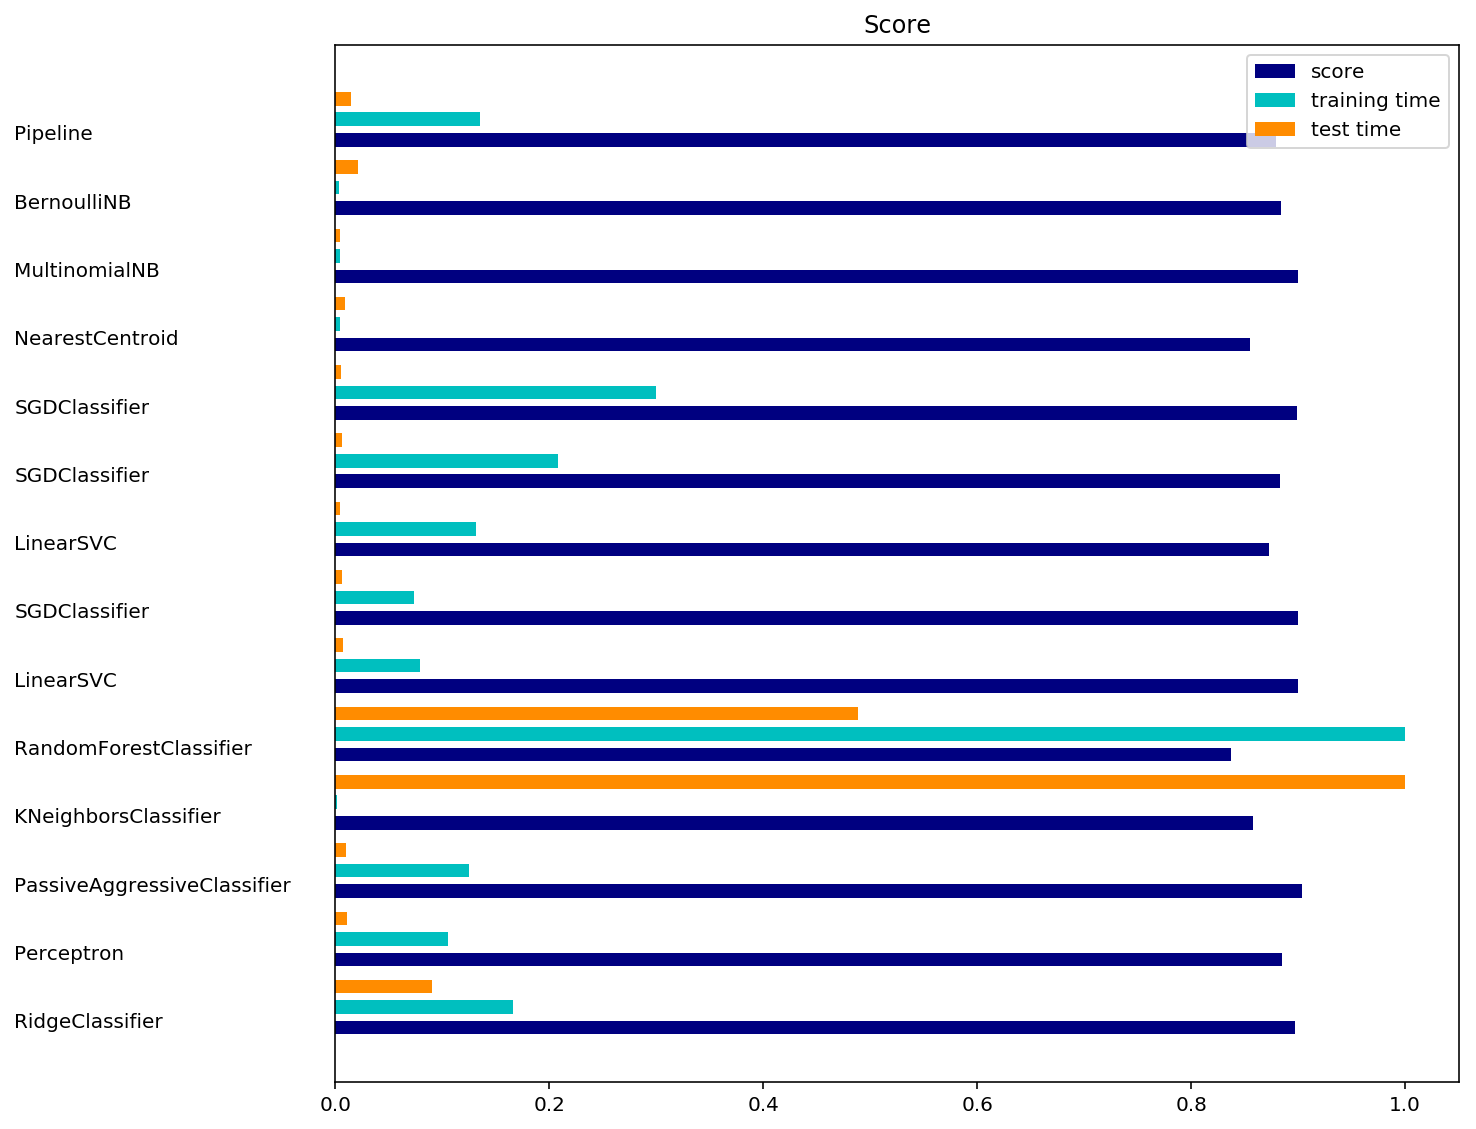

In [8]:
%run twentynewsmodel.py

## III. 方法
### 数据预处理

Built-in functions, exceptions, and other objects.

Noteworthy: None is the `nil' object; Ellipsis represents `...' in slices.
Usage: twentynewsmodel.py [options]

Options:
  -h, --help         show this help message and exit
  --all_categories   Whether to use all categories or not.
  --words_lemmatize  Whether to use lemmatize data or not.
  --words_stemmer    Whether to use stemmered data or not.
  --stop_words       Whether to use english stopwords of nltk or not.

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loaded
2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories

Extracting features from the training data using a sparse vectorizer
done in 8.670134s at 0.459MB/s
n_samples: 2034, n_features: 31569

Extracting features from the test data using the same vectorizer
done in 4.046840s at 0.709MB/s
n_samples: 1353, n_features: 31569

Ridge Classifier
_________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "
/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.181s
test time:  0.002s
accuracy:   0.900
dimensionality: 31569
density: 1.000000
top 10 keywords per class:
alt.atheism: osrhe atheists wingate god okcforum caltech islamic atheism keit...
comp.graphics: animation hi package card graphics thanks 3d file image graphic
sci.space: planet shuttle flight pat launch moon sci orbit nasa space
talk.religion.misc: buffalo beast christians hudson biblical morality 2000 mr...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.84      0.86       319
     comp.graphics       0.91      0.98      0.94       389
         sci.space       0.95      0.94      0.95       394
talk.religion.misc       0.84      0.78      0.81       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[268   9   8  34]
 [  0 382   3   4]
 [  1  21 372   0]
 [ 38  10   7 196]]

Perceptron
________________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.228s
test time:  0.002s
accuracy:   0.905
dimensionality: 31569
density: 0.683028
top 10 keywords per class:
alt.atheism: wwc okcforum wingate rushdie atheists islamic caltech keith athe...
comp.graphics: tiff code polygon card 3d animation package file image graphic
sci.space: dc pat spacecraft rocket launch sci moon nasa orbit space
talk.religion.misc: biblical 666 beast cult mr morality fbi hudson 2000 chris...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.85      0.86       319
     comp.graphics       0.93      0.97      0.95       389
         sci.space       0.95      0.95      0.95       394
talk.religion.misc       0.83      0.80      0.82       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[270   5   9  35]
 [  2 377   5   5]
 [  1  16 376   1]
 [ 37   7   6 201]]

kNN
________________________________________________________________________________


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.255s
test time:  0.001s
accuracy:   0.874
dimensionality: 31569
density: 0.005963
top 10 keywords per class:
alt.atheism: bmd wingate atheists rushdie okcforum islamic atheism atheist ke...
comp.graphics: animation video 42 hi sphere file 3d image 3do graphic
sci.space: nasa sunrise pat henry rocket launch flight moon orbit space
talk.religion.misc: hudson literary kendig 666 biblical 2000 hare mitre chris...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.85      0.76      0.80       319
     comp.graphics       0.90      0.97      0.93       389
         sci.space       0.93      0.93      0.93       394
talk.religion.misc       0.76      0.78      0.77       251

       avg / total       0.87      0.87      0.87      1353

confusion matrix:
[[241  10  13  55]
 [  0 378   7   4]
 [  2  22 368   2]
 [ 39  11   6 195]]

________________________________________________________________________________
Training:

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.363s
test time:  0.002s
accuracy:   0.890
dimensionality: 31569
density: 0.021413
top 10 keywords per class:
alt.atheism: penalty charley psilink rushdie atheists wingate keith islamic a...
comp.graphics: 42 hi 3d video sphere animation image 3do file graphic
sci.space: nasa spacecraft solar launch rocket flight sci moon orbit space
talk.religion.misc: beast hare hudson homosexuality mr 666 biblical 2000 fbi ...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.86      0.79      0.82       319
     comp.graphics       0.93      0.97      0.95       389
         sci.space       0.94      0.96      0.95       394
talk.religion.misc       0.79      0.79      0.79       251

       avg / total       0.89      0.89      0.89      1353

confusion matrix:
[[252   7  12  48]
 [  2 376   8   3]
 [  2  13 377   2]
 [ 37   9   6 199]]

Elastic-Net penalty
___________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.537s
test time:  0.002s
accuracy:   0.900
dimensionality: 31569
density: 0.188246
top 10 keywords per class:
alt.atheism: okcforum caltech cobb charley wingate atheists islamic keith ath...
comp.graphics: package 3do computer 42 graphics 3d animation file image graphic
sci.space: rocket shuttle planet dc launch sci nasa moon orbit space
talk.religion.misc: order abortion biblical morality 666 mr fbi beast 2000 ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.83      0.85       319
     comp.graphics       0.93      0.98      0.95       389
         sci.space       0.95      0.95      0.95       394
talk.religion.misc       0.81      0.79      0.80       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[264   6   8  41]
 [  0 381   4   4]
 [  2  16 375   1]
 [ 39   8   6 198]]

NearestCentroid (aka Rocchio classifier)
__________________________________________

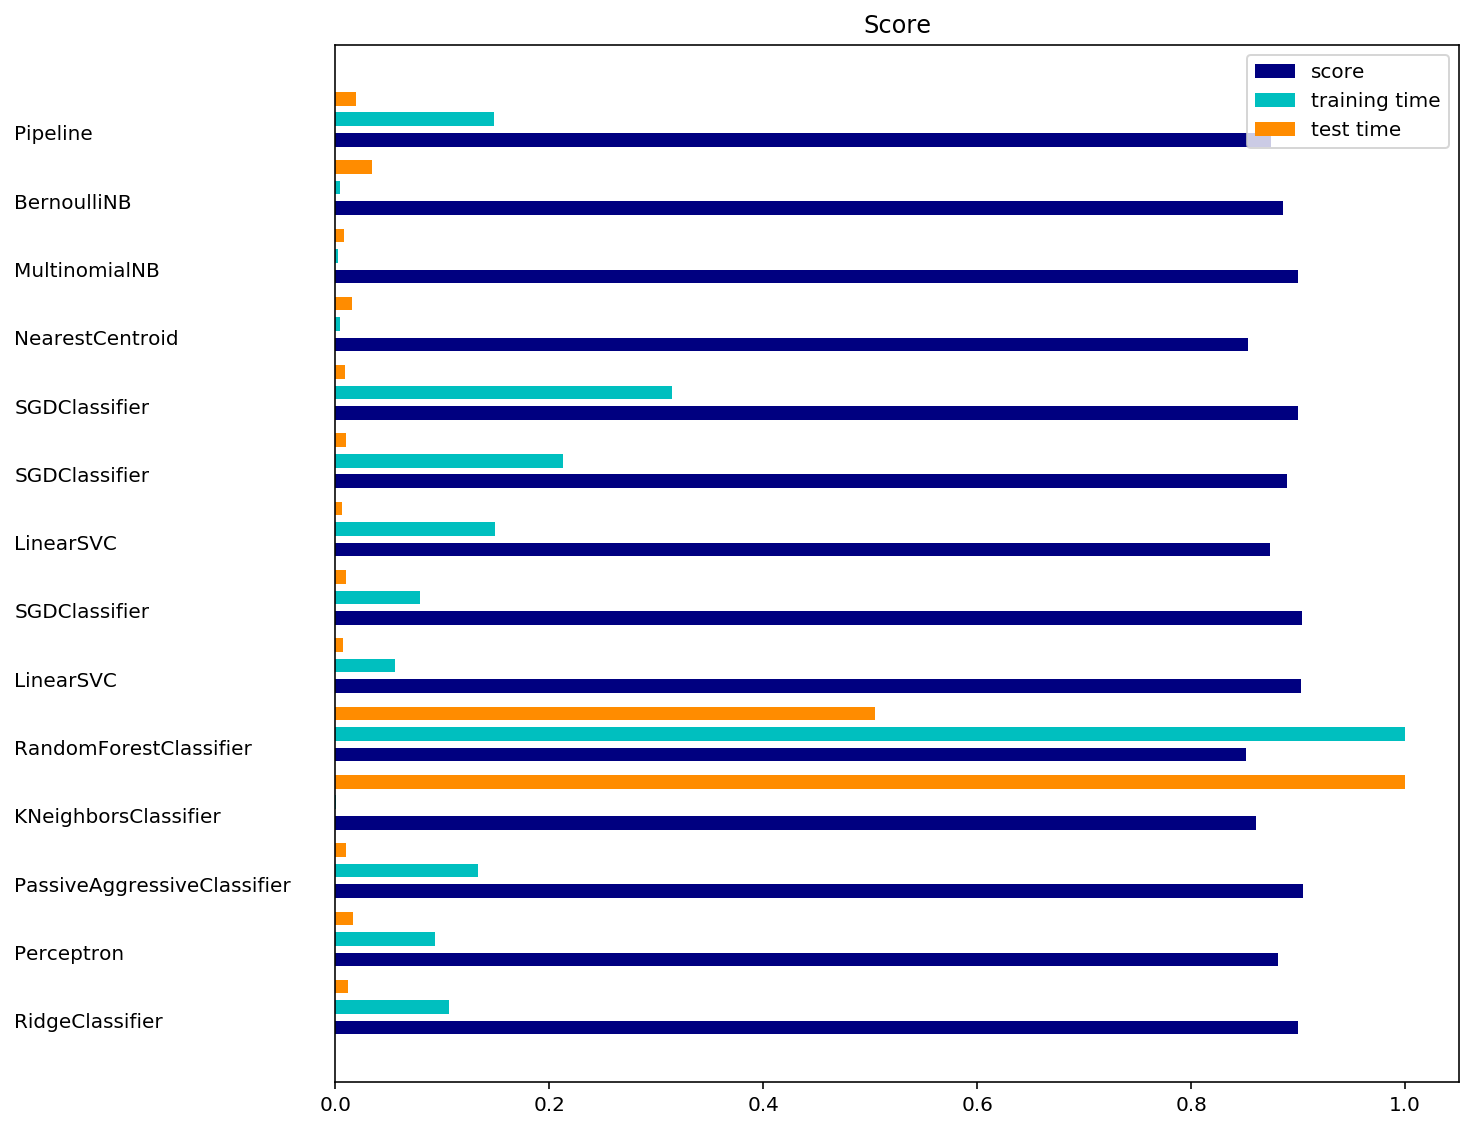

In [9]:
#探索预处理的几个方法-词形还原
%run twentynewsmodel.py --words_lemmatize

Built-in functions, exceptions, and other objects.

Noteworthy: None is the `nil' object; Ellipsis represents `...' in slices.
Usage: twentynewsmodel.py [options]

Options:
  -h, --help         show this help message and exit
  --all_categories   Whether to use all categories or not.
  --words_lemmatize  Whether to use lemmatize data or not.
  --words_stemmer    Whether to use stemmered data or not.
  --stop_words       Whether to use english stopwords of nltk or not.

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loaded
2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories

Extracting features from the training data using a sparse vectorizer
done in 10.951075s at 0.363MB/s
n_samples: 2034, n_features: 25255

Extracting features from the test data using the same vectorizer
done in 8.423990s at 0.340MB/s
n_samples: 1353, n_features: 25255

Ridge Classifier
________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


train time: 0.300s
test time:  0.002s
accuracy:   0.903
dimensionality: 25255
density: 1.000000
top 10 keywords per class:
alt.atheism: wwc rushdi osrh wingat okcforum caltech islam keith atheism atheist
comp.graphics: polygon 42 hi code thank card 3d file imag graphic
sci.space: shuttl flight pat launch moon sci planet nasa orbit space
talk.religion.misc: koresh moral mitr beast hudson biblic mr 2000 fbi christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.88      0.84      0.86       319
     comp.graphics       0.91      0.98      0.94       389
         sci.space       0.95      0.94      0.95       394
talk.religion.misc       0.84      0.80      0.82       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[267   7   8  37]
 [  1 383   4   1]
 [  0  22 372   0]
 [ 34  10   7 200]]

Perceptron
________________________________________________________________________________
Traini

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.226s
test time:  0.004s
accuracy:   0.908
dimensionality: 25255
density: 0.676094
top 10 keywords per class:
alt.atheism: osrh rushdi charley okcforum wingat caltech keith islam atheism ...
comp.graphics: packag comp 42 code window color 3d file imag graphic
sci.space: rocket shuttl dc sci planet nasa launch moon orbit space
talk.religion.misc: moral 666 biblic frank beast hudson mr 2000 fbi christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.88      0.84      0.86       319
     comp.graphics       0.94      0.97      0.95       389
         sci.space       0.95      0.96      0.96       394
talk.religion.misc       0.83      0.82      0.82       251

       avg / total       0.91      0.91      0.91      1353

confusion matrix:
[[267   5   8  39]
 [  3 378   5   3]
 [  0  15 378   1]
 [ 34   6   5 206]]

kNN
________________________________________________________________________________
Training: 
KN

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.208s
test time:  0.001s
accuracy:   0.881
dimensionality: 25255
density: 0.007642
top 10 keywords per class:
alt.atheism: bmd benedikt wingat rice scout atheism islam keith wwc atheist
comp.graphics: 42 fractal hi window 3d sphere file imag 3do graphic
sci.space: dc vandal rocket henri sunris flight launch moon orbit space
talk.religion.misc: quack 666 hudson biblic kendig 2000 hare mitr christian fbi

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.77      0.82       319
     comp.graphics       0.90      0.96      0.93       389
         sci.space       0.94      0.95      0.94       394
talk.religion.misc       0.77      0.79      0.78       251

       avg / total       0.88      0.88      0.88      1353

confusion matrix:
[[245  11  11  52]
 [  0 375   9   5]
 [  1  17 373   3]
 [ 35  13   4 199]]

________________________________________________________________________________
Training: 
SGDCla

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.379s
test time:  0.002s
accuracy:   0.897
dimensionality: 25255
density: 0.025490
top 10 keywords per class:
alt.atheism: psilink charley penalti scout wingat rice keith islam atheism at...
comp.graphics: 42 hi 3do 3d fractal sphere card imag file graphic
sci.space: sci shuttl spacecraft planet moon launch dc flight orbit space
talk.religion.misc: cult mitr homosexu biblic 666 beast mr 2000 fbi christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.89      0.80      0.84       319
     comp.graphics       0.94      0.96      0.95       389
         sci.space       0.93      0.96      0.95       394
talk.religion.misc       0.79      0.82      0.80       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[254   6  12  47]
 [  1 375   8   5]
 [  1  12 379   2]
 [ 29   8   9 205]]

Elastic-Net penalty
___________________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.520s
test time:  0.002s
accuracy:   0.909
dimensionality: 25255
density: 0.204544
top 10 keywords per class:
alt.atheism: okcforum rice caltech cobb charley wingat keith islam atheism at...
comp.graphics: packag anim fractal 3d 3do code 42 file imag graphic
sci.space: shuttl rocket sci nasa dc launch moon planet orbit space
talk.religion.misc: hudson moral homosexu 666 biblic mr beast fbi 2000 christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.88      0.84      0.86       319
     comp.graphics       0.93      0.97      0.95       389
         sci.space       0.95      0.96      0.96       394
talk.religion.misc       0.83      0.82      0.83       251

       avg / total       0.91      0.91      0.91      1353

confusion matrix:
[[267   7   8  37]
 [  2 379   5   3]
 [  1  15 377   1]
 [ 32   7   5 207]]

NearestCentroid (aka Rocchio classifier)
_______________________________________________________

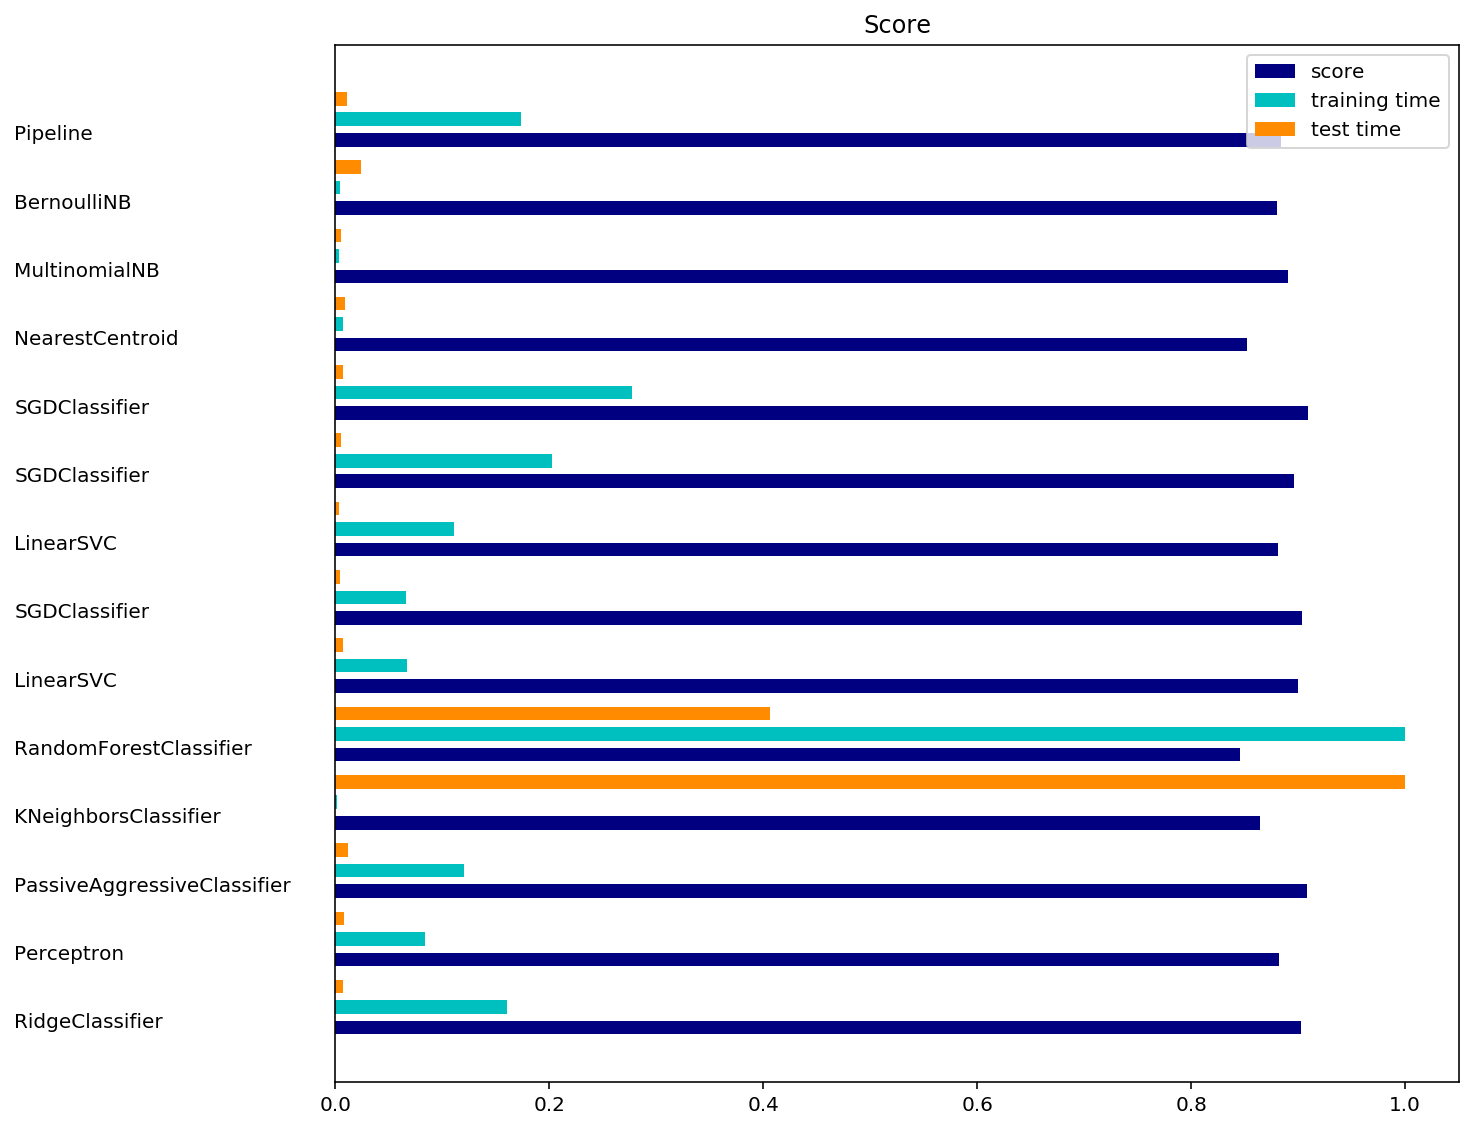

In [10]:
#探索预处理的几个方法-词干提取
%run twentynewsmodel.py --words_stemmer

Built-in functions, exceptions, and other objects.

Noteworthy: None is the `nil' object; Ellipsis represents `...' in slices.
Usage: twentynewsmodel.py [options]

Options:
  -h, --help         show this help message and exit
  --all_categories   Whether to use all categories or not.
  --words_lemmatize  Whether to use lemmatize data or not.
  --words_stemmer    Whether to use stemmered data or not.
  --stop_words       Whether to use english stopwords of nltk or not.

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loaded
2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories

Extracting features from the training data using a sparse vectorizer
done in 155.184994s at 0.026MB/s
n_samples: 2034, n_features: 25248

Extracting features from the test data using the same vectorizer
done in 113.517910s at 0.025MB/s
n_samples: 1353, n_features: 25248

Ridge Classifier
_____________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:319: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "
/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


test time:  0.002s
accuracy:   0.900
dimensionality: 25248
density: 1.000000
top 10 keywords per class:
alt.atheism: wwc charley osrh okcforum wingat caltech islam keith atheism ath...
comp.graphics: 42 polygon hi code thank card 3d file imag graphic
sci.space: shuttl flight pat launch moon sci planet nasa orbit space
talk.religion.misc: 666 moral mitr beast hudson biblic mr 2000 fbi christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.88      0.84      0.86       319
     comp.graphics       0.90      0.98      0.94       389
         sci.space       0.95      0.94      0.95       394
talk.religion.misc       0.84      0.79      0.81       251

       avg / total       0.90      0.90      0.90      1353

confusion matrix:
[[267   7   8  37]
 [  1 383   4   1]
 [  1  23 370   0]
 [ 35  12   6 198]]

Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.181s
test time:  0.002s
accuracy:   0.906
dimensionality: 25248
density: 0.680796
top 10 keywords per class:
alt.atheism: wingat osrh cobb okcforum psilink caltech keith islam atheism at...
comp.graphics: format video 3do packag anim code 3d imag file graphic
sci.space: shuttl rocket dc planet sci moon launch nasa orbit space
talk.religion.misc: abort cult hudson 666 biblic beast mr fbi 2000 christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.84      0.85       319
     comp.graphics       0.94      0.97      0.95       389
         sci.space       0.95      0.96      0.95       394
talk.religion.misc       0.83      0.81      0.82       251

       avg / total       0.91      0.91      0.91      1353

confusion matrix:
[[268   4   8  39]
 [  3 378   6   2]
 [  1  15 377   1]
 [ 36   6   6 203]]

kNN
________________________________________________________________________________
Training: 
KN

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.213s
test time:  0.002s
accuracy:   0.882
dimensionality: 25248
density: 0.007605
top 10 keywords per class:
alt.atheism: benedikt wingat rice scout bmd atheism islam keith wwc atheist
comp.graphics: code 42 hi 3d window sphere file imag 3do graphic
sci.space: dc vandal rocket henri sunris flight launch moon orbit space
talk.religion.misc: quack hudson 666 biblic kendig 2000 hare mitr christian fbi

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.77      0.82       319
     comp.graphics       0.91      0.97      0.94       389
         sci.space       0.94      0.94      0.94       394
talk.religion.misc       0.76      0.79      0.78       251

       avg / total       0.88      0.88      0.88      1353

confusion matrix:
[[247   8  11  53]
 [  0 376   8   5]
 [  1  18 372   3]
 [ 36  13   4 198]]

________________________________________________________________________________
Training: 
SGDClassi

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.324s
test time:  0.001s
accuracy:   0.894
dimensionality: 25248
density: 0.025616
top 10 keywords per class:
alt.atheism: charley rice genocid absurd rushdi wingat keith islam atheism at...
comp.graphics: tiff 42 sphere 3d hi fractal 3do imag file graphic
sci.space: astronomi nasa rocket planet launch flight dc moon orbit space
talk.religion.misc: abort muhammad hare 666 beast biblic mr fbi 2000 christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.88      0.80      0.83       319
     comp.graphics       0.94      0.97      0.95       389
         sci.space       0.93      0.96      0.94       394
talk.religion.misc       0.79      0.80      0.80       251

       avg / total       0.89      0.89      0.89      1353

confusion matrix:
[[254   4  14  47]
 [  1 376   8   4]
 [  2  11 379   2]
 [ 33   9   8 201]]

Elastic-Net penalty
__________________________________________________________________________

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 0.493s
test time:  0.002s
accuracy:   0.907
dimensionality: 25248
density: 0.205551
top 10 keywords per class:
alt.atheism: scout rice charley caltech cobb wingat islam keith atheism atheist
comp.graphics: packag anim fractal 3do 3d code 42 file imag graphic
sci.space: shuttl rocket sci dc nasa launch moon planet orbit space
talk.religion.misc: frank moral homosexu 666 biblic mr beast fbi 2000 christian

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.88      0.84      0.86       319
     comp.graphics       0.93      0.97      0.95       389
         sci.space       0.95      0.95      0.95       394
talk.religion.misc       0.83      0.82      0.82       251

       avg / total       0.91      0.91      0.91      1353

confusion matrix:
[[268   6   7  38]
 [  3 378   5   3]
 [  1  16 376   1]
 [ 33   6   7 205]]

NearestCentroid (aka Rocchio classifier)
_________________________________________________________

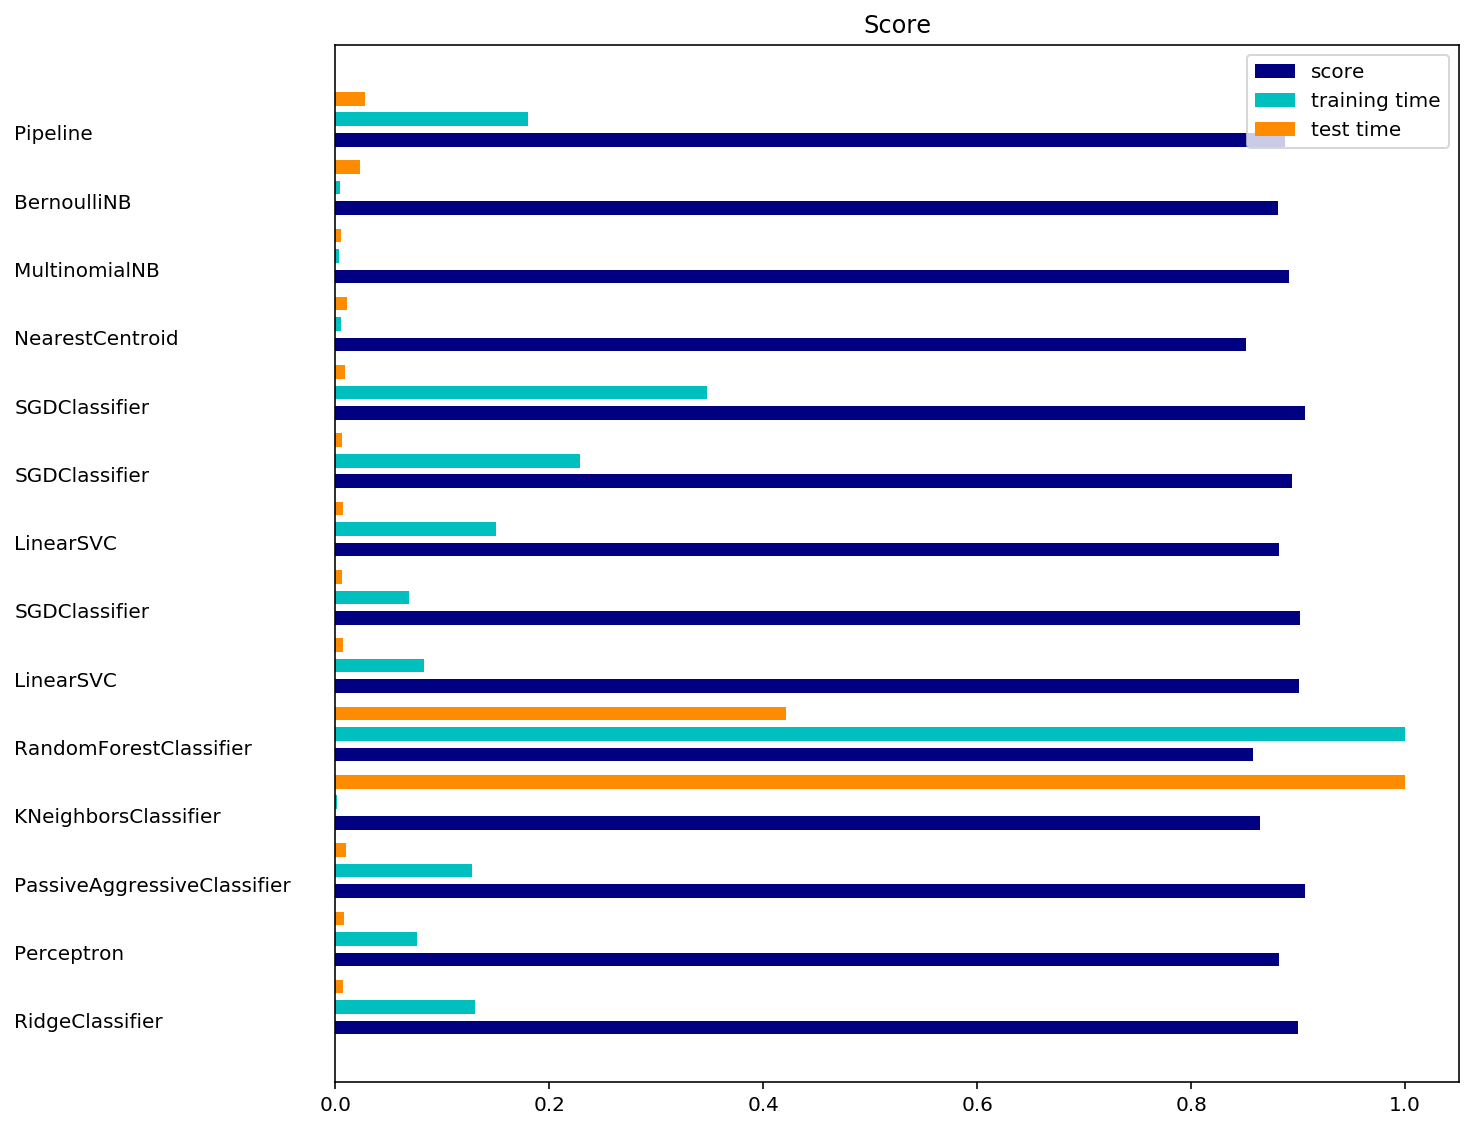

In [11]:
#词干提取+停止词
%run twentynewsmodel.py --words_stemmer --stop_words

In [145]:
#生成20news-no-stop

def preprocess(data):
    stemmer = SnowballStemmer("english")
    stop_words = stopwords.words('english')
    data_nopara = [" ".join(document.split("\n")) for document in data]
    data_tokenized = [[word.lower() for word in regexp_tokenize(document, "\\b[a-zA-Z]{3,}\\b")] 
                      for document in data_nopara]
    #data_stemmer = [[stemmer.stem(word) for word in document] for document in data_tokenized]
    return [[word for word in document if not word in stop_words] 
            for document in data_tokenized]

t0 = time()
data_train_original = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42, remove=())

data_train_noheaders = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42, remove=('headers'))

data_nh_train = []
for A,B in zip(data_train_original.data, data_train_noheaders.data):
    for a in A.split('\n'):
        if a[:8]=='Subject:':
            data_nh_train.append(a[9:]+' '+B)
            break
            
#####################################
#X_nh_train - 预处理后的训练集
X_nh_train = preprocess(data_nh_train)
data_train_input = [' '.join(document) for document in X_nh_train]


data_test_original = fetch_20newsgroups(subset='test', categories=categories,
                                shuffle=True, random_state=42, remove=())

data_test_noheaders = fetch_20newsgroups(subset='test', categories=categories,
                                shuffle=True, random_state=42, remove=('headers'))

data_nh_test = []
for A,B in zip(data_test_original.data, data_test_noheaders.data):
    for a in A.split('\n'):
        if a[:8]=='Subject:':
            data_nh_test.append(a[9:]+' '+B)
            break

#####################################
#X_nh_test - 预处理后的测试集
X_nh_test = preprocess(data_nh_test)
data_test_input = [' '.join(document) for document in X_nh_train]

y_nh_train, y_nh_test = data_train_original.target, data_test_original.target

duration = time() - t0
print ("Total preprocessing time: %0.3f seconds" % duration)

Total preprocessing time: 17.553 seconds


### 执行过程

In [146]:
#对所有数据做word2vec 
t0 = time()
all_data_nh = np.append(X_nh_train, X_nh_test)
all_words = set(word for document in all_data_nh for word in document)

size =100
model = Word2Vec(all_data_nh, size=size, alpha=0.05, window=30, min_count=5, workers=multiprocessing.cpu_count())
#w2v = {word: vec for word, vec in zip(model.wv.index2word, model.wv.syn0)}
#w2v = {word: vec for word, vec in model.wv.vectors}
w2v = model.wv
duration = time() - t0
print ("Total word2vec processing time: %0.3f seconds" % duration)

2018-05-19 18:24:20,166 INFO collecting all words and their counts
2018-05-19 18:24:20,167 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-19 18:24:20,902 INFO PROGRESS: at sentence #10000, processed 1432141 words, keeping 73949 word types
2018-05-19 18:24:21,566 INFO collected 100874 word types from a corpus of 2633040 raw words and 18846 sentences
2018-05-19 18:24:21,567 INFO Loading a fresh vocabulary
2018-05-19 18:24:21,782 INFO min_count=5 retains 33141 unique words (32% of original 100874, drops 67733)
2018-05-19 18:24:21,784 INFO min_count=5 leaves 2519966 word corpus (95% of original 2633040, drops 113074)
2018-05-19 18:24:21,945 INFO deleting the raw counts dictionary of 100874 items
2018-05-19 18:24:21,950 INFO sample=0.001 downsamples 14 most-common words
2018-05-19 18:24:21,954 INFO downsampling leaves estimated 2475869 word corpus (98.3% of prior 2519966)
2018-05-19 18:24:22,166 INFO estimated required memory for 33141 words and 100 dimension

Total word2vec processing time: 47.331 seconds


In [147]:
#接入现成的词向量glove6B和30B
GLOVE_6B_50D_PATH = 'data/glove.6B.50d.txt'
GLOVE_840B_300D_PATH = 'data/glove.840B.300d.txt'
encoding = 'utf-8'
t0 = time()
glove_small = {}
with open(GLOVE_6B_50D_PATH, "rb") as infile:
    for line in infile:
        parts = line.split()
        word = parts[0].decode(encoding)
        if (word in all_words):
            nums=np.array(parts[1:], dtype=np.float32)
            glove_small[word] = nums

            
glove_big = {}
with open(GLOVE_840B_300D_PATH, "rb") as infile:
    for line in infile:
        parts = line.split()
        word = parts[0].decode(encoding)
        if word in all_words:
            nums=np.array(parts[1:], dtype=np.float32)
            glove_big[word] = nums
            
duration = time() - t0
print ("Total glove-vectors processing time: %0.3f seconds" % duration)

Total glove-vectors processing time: 60.486 seconds


In [148]:
count =0
for word in all_words:
    if word not in glove_big:
        count += 1
        print(word)
print(count)

naud
carletonu
mmqjw
amsmartpowerst
misrael
tomobiki
spahira
mnz
gtenmc
ctpm
schonberger
likevise
dishard
opheys
begzadian
hembrow
bjoerns
knutsson
announcementof
teltone
ignatowski
bplneut
sppng
naawwwww
icompiler
fpq
oyygvm
afrpl
vbqai
malaclypse
myty
trasnportation
ncmc
garzik
guiron
fastdisk
dxcern
arld
baube
swoithe
bldrdoc
harab
jaes
dongseok
scivi
nctr
xgetvisualinfo
qfb
sylveste
yysm
faydali
fnclub
sbrock
ssdgwy
idca
unja
kzcr
cassels
avneri
nshah
ubvms
lenningrad
vjqz
realityengine
moskvich
tritheistic
fljp
enocding
zhz
newsreporting
mpitmc
urshan
hindiusm
ikq
tectronix
gmear
cxk
ktikmh
neidecker
conponents
clunie
sxlz
kedouri
aubdfq
krake
santangelo
sejba
paintjet
xilibsrc
spagnolli
ikj
nobuya
exhab
gunsot
subcmte
stamber
korresh
karanicolas
ljunggren
synarel
rumkovsky
femz
marokg
qandahar
ratbike
hvarecithra
wttu
isluga
baalim
gewong
winecj
igw
spahr
xlyx
roeber
orkkbot
unarticulate
reike
calman
leatham
mhk
vessey
onobstructed
oqvdz
herut
zahlbacher
ipri
rlhunt
utnq
avetis
f

tashko
xfaces
darman
crimetime
getnextfont
mqx
defterdarlik
konstantinople
uqx
zemlicka
thssstb
lipuma
godden
xftslj
microsymposium
giorgo
defrager
menahem
maxter
njrq
customaryprofitmargin
ytqlh
sprachwissenschaft
ferigner
limmiting
flbx
laxemburg
stabekk
misnik
lzgk
villumsen
xuqqxl
stcloud
tellefsen
vakit
bbzx
dgkdm
mtsg
mros
borshevsky
odiselidze
unbilical
occs
talluri
wendall
itivax
voecking
udmh
difussion
applelink
rhand
parcplace
estsc
menahim
apocalyptist
burrill
modester
erini
higmlv
breadthtaking
warkentin
tpj
xwhen
ldni
nucletron
lobbia
usfmctmf
linkous
unidisk
vbt
clldomps
wqody
jenssen
anaxandirdes
seawifs
pschneid
xmplus
tranciever
ontariocentric
kjrpkhf
fqokc
okj
battan
gepiekte
ymf
ahatcher
ignbrk
ybn
capints
chabrow
adoptionism
dsnider
tekproc
bassili
idjpu
schneck
tbxzz
lapidot
telhob
icjv
dispaching
zupcic
khflai
kgrider
rivm
hamishmar
decchip
anisetti
xdax
havemann
javl
zoroastres
kfymk
satenism
tashnak
cmuvm
pww
turgut
hppcl
pastortalk
gregof
medtron
dawagner
wechs

degridation
canadarm
xfix
herzgvna
bosiooo
julkunen
plngu
nyq
borje
bisize
sasjhc
podnet
ossibly
ijtev
balamut
kosary
lmtra
scepticus
cbnewsb
blean
alamutbbs
wdctl
bibliographystyle
vcvcbz
posteers
alltarget
gutenburg
direcktly
anqan
brintle
srussell
micronesie
zqvg
ldfyn
iiisi
mpoly
hqe
welbon
catopen
rpxd
kuc
aedc
mcck
ellegance
rgbquad
xtnwrap
mbuntan
hussni
masalha
soundconvert
moorenet
aatchoo
etherlink
assailent
cabc
djurgarden
karakashian
sefunot
esapublications
naziman
hplabsz
cirx
wfnwzjz
eskagerb
apertus
transmittence
kquar
gopath
gonullu
simultaneuos
ujax
pashosh
hprm
caminiti
paintshoppro
kohane
shergold
cssun
vusrmc
democaracy
inescapble
hollasch
cuay
heardthat
clipmask
uflorida
playcd
pwu
zneut
acscvjh
oscialltor
escott
courtnall
mlki
deliorman
ivtah
mmbp
contrer
debrusk
abyte
clarkies
genuss
fhuglst
nkjzpgvzlki
rgreen
decisevely
pixgc
nondamaged
ebfgi
meeus
tardell
crossreactive
iaz
achaeminid
indgil
gatenb
inputonly
ssupports
mzm
jjn
ksac
grolier
sustaint
shamsky
visico

kalmamis
iuub
csjohn
hwq
kahanists
hurree
storhaug
prens
aktueel
xra
aproper
nengle
lostweekenders
gazigiray
yankkes
successfuls
cxtgcx
driveware
mlsma
moqx
catone
hetrogeneous
yeaers
macalloon
pilisar
mqfbq
rzayev
idare
tnds
darkbawk
orchzv
kwzwx
repondes
khristich
molniya
desctiption
ksackett
libxaw
schleppo
meih
koenigsberger
varags
sastls
karochka
odjz
isrci
murrillo
fitzmyer
aaareadme
ardie
zkdz
jach
orstcs
pmartz
netblazer
dhvg
nobrega
jgreen
xtvacreatepopupshell
penzo
glalonde
rsaref
bankst
kpikzsfj
qsiiab
bosinan
yrr
pjzvex
drporter
adaptic
nrpit
rlfeq
holohan
jyxrijfllyjx
bocharov
drahim
ypo
alatalo
osmaniye
uuconvert
vyk
shagen
lezgians
shzrcho
ybxnx
itnkhf
wcilu
uykp
kuee
xtgrabnone
jrobbins
bortels
machnik
sorokowski
ukies
hellamond
elabdellaoui
sjnx
gftfi
felig
jabir
remmons
mkcx
swkirch
yugos
holtsinger
patalsky
unlinfo
bernstei
calentool
joshuaf
qreqqzb
kukis
rgbgreen
kaidor
nmmf
xtnwidth
demandinto
tillyer
mwmrc
berkenrodelei
cancerlit
bsv
nisbitt
gsdo
bielecki
ennews
i

exitserver
dmittleman
includesrc
knqe
osinski
cchu
iane
pmalenfa
xtinstallaccelerators
pktww
wwhjnp
bomgardner
pikelner
vxrzm
spagthorpe
lastdrive
tkwn
twalls
isaackuo
dascenzo
ncrypt
flhtc
gwni
uqyk
erzberger
mcrware
maslov
eosat
bgwwfdc
primerily
chts
uulpwb
mbellon
veiq
ostrum
introtort
institional
georgel
mlwe
mailsafe
wqcb
aayau
disections
vnjsh
molekulare
uhgv
pftb
olnes
laaksonen
abfdefghiijklmmnohpp
zwv
sigmasystems
pomaks
cnadler
apsevokoitai
dnzc
turbomodem
jpbb
xzrcl
zslpi
beilief
divaev
bocher
joyl
iconfigfiles
otj
henbest
gulyiev
cellsat
libsspkg
iilo
qtim
lfz
niksula
yahveh
ncifcrf
kalkgruberweg
umarete
qrx
figraph
qthvzg
timerlo
ferranti
qvdu
partap
lqr
hoemoepath
uzax
scanfirstline
jancene
tromsoe
zrcim
emulatorw
guzlers
mbqet
mfoster
bgocbdf
dmatic
mattell
moonbases
cifically
wwh
snfrancisco
lcdn
utsiktsvagen
qjd
rmzvmmv
fnajz
propagandation
qabbalah
killclient
hipsaddon
nokz
finei
yxhv
spacify
jjjjjjc
kelleyb
caommand
xcutsel
grosseteste
xtaddworkproc
dsuvax
vandenboo

xbut
orselak
suninit
gjg
ixbuild
samuellsson
bivj
polaization
qov
vumu
antiochenes
dimemsions
stellix
sciamanda
zchnu
kramarsky
zmhi
opponenents
znkia
colatosti
enrish
xresource
iconedit
symptomalogy
peloponnesos
duest
lhod
xtnallowshellresize
arnautovic
guwmo
megamax
ellett
geracie
dpang
pcuc
canko
fabh
japlish
krzeszewski
rqp
fyld
queloz
busmouse
weinss
lamontg
kmcvay
isyan
antineoplasteons
obw
wzi
bjoernar
kalliope
bspahh
rrdg
mmwr
oqv
islamistyki
keyboardcommand
buckeridge
mmay
vaxstation
silahli
kegse
preferedly
grafpak
reinacker
mzdj
hchung
nanney
hjstein
kdvs
latexhlp
jbu
xtallocategc
bzcdl
leninism
apion
seewald
kital
loadhigh
resopnd
motoland
corlu
mtwp
ninjakun
mechinical
fnbc
beyt
ungraciousness
schusman
overbloom
agney
beliveau
muos
stardents
depxmulib
caninin
cormyr
ovx
tamamidis
raytriacing
gvzll
oaq
figmo
bzb
oavzx
dlxp
butterworths
wafffling
etchmiadzin
imri
celeftgp
kqqj
volaski
ucns
beimer
dqa
ingaan
esoc
lauger
pfyzn
jrziojoy
eroglu
acsddc
queensu
totalitarianists
he

panice
batelle
tgxgt
superquadric
leonids
viewlogic
cvetnic
mcelwaine
znkj
vmj
maketheirday
tudjman
dlphknob
pbqt
sandiegoca
vuurtoren
ppbxlt
wnx
ikzd
ixathg
pankey
pronouncments
terakki
papazyan
sbtc
tiwary
mbgf
icor
nikhef
ruocco
leglasse
riecken
ankerberg
matusevich
mzt
uswpm
texturemapped
shelltool
zcwk
rewaa
ageis
cartisian
facchini
uenics
marktomorrow
termws
giammarco
passwngers
qdos
grichard
dataio
mceachern
cfob
dahlberg
hollebone
buttuls
avuo
vizability
zurlo
xtk
jrngvzlb
abdulcebbar
incombatible
musocs
szeto
princeon
gsager
hangfire
vtkv
rocicrusian
leberle
ggwa
ztp
tkv
lyddy
tftg
scheiber
whirrled
zzx
yqc
hogssc
turcs
indetifier
udtu
phlarnschlorpht
macwherehouse
xbae
ifdesired
fourdee
winjammer
infinietely
glxmdraw
kbriggs
complilers
tuuo
prunet
hagerp
kazimir
yuc
anyoneand
gooyies
mrft
milsh
jeqz
quadracer
brjgb
exmpt
kwhetstones
xptable
astrup
lmv
rppd
sabahaddin
benningfield
sncc
annala
appleshare
zzzoh
missusing
vyacheslav
typex
hzo
ravelable
lcarr
rchzrlhzv
livigni
boi

boobin
consilio
unidus
sheutter
shzrd
smuther
fraggi
meritt
bolyard
lreflected
djz
toolplaces
appmaker
kmbwym
espaecially
noturn
fwmr
vueicon
icebucket
ryer
xbuild
kjznl
fallet
vanderveen
mdyscg
knicknack
ajzlg
overtranslation
perimenstrual
pgrkax
sclark
bekiran
ldoje
mapleleafs
rossinc
midluteal
sebil
yingyong
hamillton
edtorial
maigret
chumphre
gyyr
transferes
reforendum
hqax
hzrb
sqmv
mspede
ynz
pconnid
wickware
techwood
ujrfz
lqrpu
softsolut
jesuitic
succiently
slitely
mcwa
devadatta
anagld
jzou
assilants
bekir
adshead
tlas
poupore
ivica
communitity
zqawg
huek
youngbucs
bytesafter
npnt
todaysdate
cylink
twwells
zipguns
implicataions
khrafstra
appraently
optaddress
pruden
sunnyt
jyr
scdrye
pmio
pnesbitt
muhlestein
upv
vovp
qqk
guyd
jhufos
aqmfog
jrnki
mkns
bzo
perfomence
hohman
laints
drand
rsavage
btzx
llly
intereconnect
vxf
biosym
catpe
pnyo
frambuffers
zinberg
yougoslavie
beckmans
thomask
havai
bichette
chetter
mnayt
voicenet
lysator
fji
jeffcop
kolodny
dediu
stersund
speedsail
j

xmndialogstyle
vwmzurmq
muehlen
schaevitz
millgram
jzlevz
dfki
ducklin
boever
wtte
realisierung
compsurf
eastbrook
wieman
blumstein
bcj
dolayi
fakultaet
smsvma
znajznah
woikin
reganomics
leavewindowmask
sdscpub
seagoon
hwgv
felsner
wxg
anecedotal
kxh
dxrbhj
verschuldigde
ujb
xsoviet
subpolygons
iabf
marrianne
dctv
zvmk
bargening
bayburt
zinaida
qmlink
discect
xtsetlanguageproc
camosun
phornprapha
musson
dkis
zye
untrangle
rebop
phjm
rlhov
zuflikarpasic
jpaparel
anscestory
vxo
sdns
hultman
vwl
hersheiser
roborough
torreypinesca
lagvindan
posessa
dyx
staatlichen
pseudocollisions
robertll
expressmodem
lankform
xposting
teemtalk
ubsiler
adriaansen
nosubdomain
rrgaej
fynjjjjjjjjjjjjjjjjjjjj
povshell
stdisclaimer
rtaraz
marlan
rchzrlii
smjeff
ckh
opiini
neurobehav
wwiz
hughey
drph
pjaques
igilbert
pihxk
lxh
ccws
measurex
bskewe
mjlx
fxstc
moromn
continuoustelepointer
sulx
jcarey
znkhc
wfq
tauru
woolard
nrao
iiq
pffffftttttt
pychology
xrefresh
nessin
javz
iselh
aoqw
tmvc
jansz
pmdb
kmembry
in

teskey
actix
xobu
locallibrary
aangezien
zwz
larsonian
tankut
desqviewx
etfll
yzgdk
nlemur
rsiatl
jmatkins
zitterkopf
ajzleu
pitchering
agona
geohub
obmoralconclusion
pnelson
aicsf
thomasr
iprobably
shppg
zlmf
memas
gbeb
hurva
thewho
gumru
cgordon
molluscous
pktint
khb
cmwolf
hbwj
pmirr
obviouslu
toxoplasmosys
deichsel
freewayin
ilitch
iycb
hplabs
yjvbf
ocst
hsvaic
ocit
quietwriter
mlevin
fregit
darylm
nyjnlf
ebuwoo
kulikowski
amoss
xgetgeometry
chamberland
roadmarkings
tashkin
soote
rbemben
optpages
mlists
tilque
umec
hertzsprung
clbooks
oprichting
hinhc
ruffinen
lowtek
meenps
qrgb
chaudhury
bsac
ringsveien
mamrd
wrhjn
olpixmap
pellerin
pieprzyk
thewalt
aiqq
yankmes
oawynt
pimr
xrmoptiondescrec
stimets
hizekazu
prumlg
axr
ntitle
multitech
aerospatiale
metallurg
unly
oope
qoi
rfkt
viktiga
timestwo
andonian
egalitae
misaimed
ophthalmol
rdrs
inala
mtou
vmoper
postalunion
kerkhoff
prspective
mycallingprog
jbayer
corvairs
sppp
hlhsr
ldmy
fastwrite
dseg
tfjz
sjmadsen
dmatejka
micromho
shirl

trdatov
potentialtion
fundamantal
vwwt
distructions
zyeh
megacandela
vwsx
protanopia
zjd
melh
nordenberg
hammerslag
mechamism
quoated
tdq
tvist
xwais
dectectors
lappeenranta
hubel
romdas
dungeoneers
lewontin
vanderwal
maracus
robm
palij
wvrgz
xptablemakecolsfitquerywidth
valetin
usijs
agsh
worksta
bordres
bwq
vilante
hansch
cnxu
gartds
olistic
fiagu
jjjjjjjjjjjhv
joakimr
gaumata
faircloth
jsv
mrip
crxp
hackerly
vermelding
fiyk
idndication
schwindet
gunaixin
antirational
manafov
tamvenus
owhz
obcrypt
birakismasi
blewett
heatsinked
defenant
gmj
plasmaphysik
datri
infospunj
lerc
mzxe
parseblock
vislab
whsld
dynix
ftzrlk
kazima
rezaei
fhdsijoyw
transientshell
nqai
defaultvisual
rgbsrc
londoff
thomsonal
cnes
vjjk
rchori
tanzanie
kocharian
cfznhw
ewft
lafiph
gwrra
dumbshow
kitnevz
steigy
nkjznb
quindlan
lindholm
zymmr
xtires
hindparts
anninversary
constantle
nxnwmve
linited
sehid
roooster
udel
genashor
plawaby
vqz
fecteau
lambient
mied
akgm
affilitions
nonomatch
yjr
usueful
wooff
ictc
ennume

simonsom
vqq
krj
ykg
xksytxr
akiernan
grrjku
koptev
magupati
wzcdww
vanhala
wethat
ayyup
rahem
counds
networkability
infolog
umyzzt
asulfidine
kloten
unizh
solbournce
mistubishi
hasch
rsvga
csgi
propertyowner
muktars
failaka
szd
asrlk
bertastrasse
lusn
hakamata
brzyckmj
lemelin
decruyenaere
kjyra
ppreside
dunixconn
rbarclay
rosevc
amphours
fahnen
limitee
rfto
glhewitt
habital
stimulte
ihy
castelman
unoki
shaig
ikonas
chipsw
ukdq
icyuzu
valuino
overproliferation
skoog
onpredir
thevenin
jiquan
alod
tablewidgetclass
rvesterm
wchau
bizer
cruso
rzwz
mikhailovich
preparata
jido
sbccmail
hollyman
dmas
heddings
faludi
distortedreference
teledisk
priestlike
twerdokhlebof
qef
homogeonously
suosiollisia
wittism
catain
iczer
xiangxin
suttor
reractor
pqhl
slqnsl
vasive
benkrug
pmvbgtf
klopfens
rnkjr
netportii
ssbc
getoff
fuedalism
gladman
mwwq
doublespacing
cheribums
fmjs
vecta
nwwm
bucklin
barbequeued
soxtrev
xtappcreateshell
sprintnet
packmind
wwerner
unced
patrioticly
gideony
nkk
porklington
com

stankerr
xrmparsecommand
pennebaker
datapak
mpgu
hoiles
toolikt
atmbree
renumerance
nordley
lehrstuhl
wrenchers
aiq
rtctg
amiganet
kanjitalk
wwhj
slqn
satterlee
dpop
hmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
xrequire
kasajian
xvga
simplelatextarget
clibstatus
jackb
mashao
mhpef
gww
miari
displaymanager
sahak
cedkeymap
ldcombineflags
propethic
drahomir
bartleson
tbgy
xsometimes
alavi
ivnorm
etzs
rxkgre
sisha
xvnews
cnavarro
hawgood
behierarchic
jvvs
bstatic
jeezzz
muessen
sommarvagen
tacom
waaaaaayyyyyyy
antibigot
icrc
antemortal
zokwendle
barrry
colligation
kochanski
xvertext
riihij
periterr
misgauge
lgtgah
xhryxj
xtdestroywidget
langmaid
ujf
ugiz
irbe
rdvbz
rosenthall
znh
wcjvrm
jofried
gotabike
boudrie
deferexecution
claar
jackatak
sabbatarians
contardictory
hqq
shortsop
mtrek
fuenfzig
interactivly
xtmenu
ruland
letsee
gka
perou
pcad
mevs
itewp
orsulak
swaggarts
hurh
folddow
hvo
xmovewindow
nancyo
rjvkad
cevher
jfjgscpk
mbbv
cclose
dfci
bricklin
onroot
clewis
jlfijs
nivat
fsg

adaber
seaprate
svcxq
fnet
neogotiable
fennelly
xbased
ermenistan
mychalkiw
obere
etkin
emks
facman
accretieschijven
colourmaps
chiliastically
sbanka
laosinh
bqdsiv
huseynov
vazzag
repeattime
marriing
eraned
faxability
commsat
meinherren
noika
beovox
reymont
unsignalled
delcher
hfnah
dhrystone
toriod
contiplating
intelegability
vryw
usrx
cptully
gpatapis
nzu
uiui
ydet
liester
oshag
wvb
qvg
ofdel
vermes
mandtbacka
kufdm
upham
binefs
accipite
libxvps
dptom
pclk
agwe
prednisole
ibms
wangdat
mqw
obq
davetorok
inabu
tobaccco
proseletyzing
wntshoxy
manocha
theapocalyptic
drawplot
eckton
hamalainen
uartcmd
vmatb
iorg
limmat
alany
elbridge
hahahahahahaaaaa
microbrian
tomj
ujc
sibbald
seetex
tkj
uqt
cmay
jyusenkyou
sphodra
cvincent
stanway
pgvzneutnay
atttributed
agestino
execuitive
standarize
xuaww
spacelifter
tuwien
unenforcible
xparsegeometry
horb
modificvations
finnie
butm
kcgb
mamaysky
transpariencies
congressgrades
hhpg
qgluje
aicons
navitsky
hwu
jboro
pyrnova
xrunner
stevevr
lampman
guw


iannamico
jberman
jamea
yaquinto
tutankham
lucock
meulens
helser
artconf
fazah
susect
waldrop
ihlpm
pasquariello
mzf
astalker
dxcomm
thurm
nhyr
xnq
pavlovic
lhx
efeustel
fikpikxp
installnonexecfile
coverare
grieggs
gubatly
lanera
exorbitent
justinf
atextlen
tkmc
muhammadi
genek
ouzq
rashit
macintrash
voicetype
leebr
filipivich
savelle
velapoldi
filipowski
tdawson
punishemnt
sportsdesk
pgdn
asrcp
muutamarivinen
lupbbvx
xwlr
gagit
hatchbak
kkb
dxmail
privliged
buntan
cbusa
btkl
fusioneer
minya
xgopher
highlihts
agrigulture
qyw
ishockeyn
itabe
simearth
strabo
mmcxdt
xsynchonize
reducio
fhb
rmasv
solutionsand
rawlin
slooooooooooooooooooooooowly
kilcore
dosgopher
tsiyyon
mftobdf
zcon
shzri
kabaidze
gilkey
tierp
qsecqs
deliveree
kkmsfz
gnuemacs
jamyers
chemistrys
ftpmail
xlngut
peeeceees
bongiovanni
nkva
hcrlgw
prinicipally
nextnet
tekulve
lehtinen
vethewhalesshavethewhalesshavethewhalesshavethewhalesshavethewhalesshavet
dunelow
edmahood
kamienicki
scsa
zlkitnl
lwqnqa
archishop
autoxec
xjohn

uqp
wfunet
qodl
ajrnb
obstetrition
hizollah
xtnborderwidth
eclise
ljw
perjorive
xzp
graphicsgems
spacepac
idcbbs
harrisp
skarda
siecus
pyrdc
lzsc
notuseful
dewight
respectedly
smartcam
unconvering
kotj
eceris
anderrson
maclennan
fpf
msgyfv
protman
slaby
tablehockey
kiqn
intersupercluster
rayshade
lincolnr
znj
nkz
icx
inescn
asedit
xptablewidget
andok
jwminhh
ftbb
parenthetcal
christic
berehowski
mtgt
xddsy
pxfx
dddpanel
uncleannes
jackw
esmw
zmef
unipr
verbitsky
zznki
reinoculate
vilb
constituitional
lintronix
cyberglove
tdliu
dietrijj
adaptabtion
uezd
mvjc
ianf
leygara
squeezeright
rmugele
bpq
dependances
mtkgc
wjf
coulman
lgnj
gochnak
henslelf
pmup
kwyjibo
zviq
unlvm
dotsonm
qviv
mathreader
sorinc
mortman
deneba
xfed
thian
chnews
ylgl
hayesstw
ungsgard
krlk
karamchand
incdir
utstat
brkint
korenek
makhaddin
nrhjwt
myxs
bilardello
zikopoulos
xunless
pamphelets
gregh
vcq
uskmg
hobday
xghn
yhb
sfsta
bedemir
aksujx
inqmind
drohan
misgauged
gakhaus
donemi
mlyaa
jordanie
jgcombs
xmstring
xf

compacq
nzh
doleh
mqnsl
puryear
hanlan
aduz
ussnail
vaticanus
ywg
fudgeo
tojmparkin
centerstands
oqvdo
rootx
dmq
azqp
sysrick
idmurd
kwansik
qfd
khfnajz
boutch
bespreken
sspa
cnsr
sharedcodedef
giesser
aftersleep
ojuz
jvj
papsttums
pfirst
qssn
mazf
nonunix
hamiltoj
richardf
verbeek
yqi
dohr
tbdrude
zrlj
dpcd
dipeitro
lefttitlebutton
jqh
dregistere
mfischer
kimborly
tabarraci
scanrates
shurik
jhensley
uwf
yafy
electromagnetical
dleonar
governmentski
igd
hawerchuk
secotro
mediou
wofu
cmapaigners
physsicist
heilmann
bxfsiz
bqh
sbonsib
ultrastore
aspibin
hounsome
xew
kruislaan
cinan
mintaka
portacio
bmmhsz
qggv
yeasu
gimballing
kultigin
jdtntl
dlint
balltown
steinbrenners
jeffp
irhasat
getworldtype
oqdpw
gumout
akpazar
icna
utxdp
laurila
dcss
hulman
buhlig
mvsodd
simulog
roleson
henling
hbae
xtgetvalues
hhcp
nlbxn
yqv
cookgreg
lancorp
mjhq
xsunmono
xdbg
dlhurz
wfwhlp
bureaud
equilize
exactlt
contentsthan
driverand
murawski
instytut
fcnl
bauder
wzwvg
rocquencourt
oberling
mdrqe
mwhwc
hzfr
t

nedod
pheq
durusoy
xgm
astoch
chuq
cornhead
bkpai
hallusion
efb
dzzokz
ubv
dfmorgan
dlists
ttuiy
tzn
xnam
yjz
lewallen
pscript
rosenau
acunerbb
zrchzrlk
kfij
leyritz
gbdy
unsepecting
aflc
muratoff
storables
maynardverse
ncel
varf
xhkk
khahl
reuschel
gsfc
martyj
xmnokcallback
sssssiiiiii
srlnjal
swknasri
relatavists
xyztwm
ukpr
murashie
lhawkins
miscompare
pmetzger
peoperty
gdalsrv
artsakh
deeptht
karljo
serdars
tryndoch
suncan
feid
velikovsky
aanerud
pnanci
nred
avanesian
dtvpgi
stolk
punnishable
computeranimation
mnatli
telnetted
farjestad
pcollac
skcgoh
hardcard
bhtulin
ahrimanical
mcmath
xbutton
muoto
scutel
csus
mcgiver
congroller
daimi
yty
vuecsavh
benvenisti
kagotani
kfri
ngvznb
petn
mqwxx
keykeykeykey
sumex
corvin
corbitt
emrick
fyxa
eyum
construcrted
impemented
mpmg
iqrpl
midet
xviewbug
pvbudk
ummosk
hlfga
lwzdqzd
jdwj
shvern
eological
khby
smartcan
mslv
wonderfool
hedu
mbpq
yikmislar
scopemeters
jhunter
wysiwig
mnki
mirsky
jjv
jwu
yktvmh
qhead
mjjjxn
acronynm
froeystad
mlvu
is

iqpv
apcr
cothren
unlear
gtbi
maruk
bhflv
tasallot
barfie
fenger
sittner
gchxb
ftyx
adscriptam
wqt
cousinetc
assholeism
afduqy
cornerdelay
jarosz
kuznetsov
tenstions
explscript
xdw
claeys
borgwards
heung
gcub
ysaron
wietek
toffler
visuallib
jungclas
copyarea
csdvax
kensuke
electroglow
szah
kbanner
airk
exod
petranovic
cunniff
albae
mvhpg
speedstor
dpgs
microcal
xtmanagechild
ftaved
qxag
metheus
wiqg
ordyne
konferansi
zbl
cherbayev
schbbs
nicinamide
diyeni
jpegview
powercache
sigarms
hoak
disorganizations
ppdl
schwimwagen
kessner
coswoths
gigabuck
dagdagan
fmkp
ssii
olympuck
rlds
uncooperation
jawdat
schnapp
glennc
kyrm
jge
altheism
mensrual
slacvx
itifada
uqw
indiciation
borderpixmap
chsu
awq
rmzvw
mqvei
netfind
sharperson
dreeam
pzd
solicts
wbrand
koepf
armscorp
srhj
chzrcho
xlocaleint
brookpark
secuturity
wolverinr
demuxes
iqsho
gooooooooooooooooooo
brener
armandactivate
pqb
macdermid
qsem
plotpoints
xrlogind
okopowa
setwutime
jfxok
kgix
calibrat
chaum
wickander
organpipe
billh
rchar

bmnpa
readjoy
mswin
procomplus
seventys
qrj
sivesh
lhzrcj
uupcb
deuelpm
tnkhf
ofwg
uising
elliotte
armenakovich
expnesive
paradyne
gaet
xauthsrc
esrock
jtbl
xxao
dschick
mscdex
impaitent
ailab
colnett
xdbx
gompers
vanderbyl
xskzxk
zznkzz
experiencces
wmbxom
sicherman
kazhakstan
darrylo
executefunction
mtq
axgfng
umuduyla
awx
boardwatch
cxq
directrous
wwic
wmzur
noralised
sifef
ameres
pohw
vroblfaqfsbwp
laetificat
huddinge
wllz
moyne
itseft
mrchzv
kmdt
veytsman
siockman
xtis
klasko
kuusama
covlir
ecicrl
iqy
geoffw
tarkiainen
kladno
acsu
ydoh
vesterman
wkql
marktstrasse
pcheads
deelnemer
whatfor
bddt
nlu
rgbmode
whirrr
yza
jkdt
paidophthoris
lhzv
bdolson
ttrusk
callimahos
nflynn
thundarr
prounouncement
xaw
kaamran
mcorbin
recoznized
ndzdj
papay
kokk
msoe
michaet
zilfi
odbt
msdmn
timerhi
hajefyrouz
wmuv
civlized
imagepro
eatchar
mvbdi
jmaynard
undby
jwmorris
ejjjj
targemasters
operoni
strolman
xbei
melkumian
tonshire
kylmaoja
sonett
ontstond
jugoslavia
idic
obninsk
wvnet
vzljge
devleti
ob

rodenstock
carels
sakarya
extendchar
vjuw
uzw
bwzipos
mswu
lolgx
peddel
jvxljw
khimik
sztuk
zjjwzjk
jumnping
unlieing
bodrogligetti
tomca
niqd
vnkvb
iftaa
artieb
crres
jxu
mgoddard
vzneut
sikt
semikian
willmore
melewitt
tmusc
shalhevet
stcarm
sunprops
theiner
unmvax
rolleicord
nhfj
slclancy
nuict
mwilson
ykf
karlth
niedlichen
cmsr
snydefj
jsertm
linnig
zjn
pmuc
wtx
mqrpuqrplq
oriolefan
dvax
hqf
afafter
biberdorf
armeniya
fikpikzs
billdboard
yongje
eblom
dfyl
mcgrs
urmq
jabin
eventhandlers
melander
zyv
elographics
togglebutton
lvdhxdv
mrxr
zqshz
edhew
colindo
secqs
shupe
xtwarning
ajrpahf
replyer
jaymar
videocart
pcci
cristianity
jlaqz
bjcon
bosnie
cathye
insat
fjt
xvyklu
feigin
archaemenid
haanpaa
hubertc
turklere
frashaoshtra
cavallini
midelfort
kampi
transalted
lazz
oldload
nbq
kasprj
volate
newamyjpeg
pericom
rcol
ascriptam
resomeone
marlines
recondensing
gozen
mxg
seatte
sennas
hyacinthe
giamomj
imrlisrg
merknaam
pageovercommit
feace
hxg
vinnaren
marchment
oofgm
isoterm
cgcad
uof
i

oldxlibsrc
controntation
keqd
ttttttttttttt
sebek
closeley
xtcachenone
zqt
jhpb
enthuiastically
cvbnetprime
osmanli
aaronc
autofact
xmarc
adaptac
loughery
waqw
jjjjjkbxn
pointedto
knv
rsy
jeda
toagree
handguncontrolinc
wpine
radiocast
shippert
callbackdata
sarek
billosh
stacken
xtsetvalues
applicationcontext
ordunun
jrngu
respexit
pvj
vpot
fquqdh
cilician
faikoglu
yugoslavs
eaps
qhw
acebes
torok
csufres
khflg
zdabjox
jepardy
ghws
vitq
phenylketoneurea
zvezdny
jonell
ldecock
planeten
jprice
wmshell
mjuq
largeer
wallacen
akhras
beaupre
iuv
vishdasb
biakin
mmblk
wroyh
akz
hgxtk
cosc
ggj
eesau
pwithere
dacumos
uzan
shenot
ingerle
cimrchzrck
djurgaarden
xqr
consesensus
netci
newsgrouop
ecss
randolin
ubvmsb
vettenet
mzp
artmel
kelbadjar
pgjz
dtrt
excontexts
zbwheq
michelena
underacheivers
nikomakhea
fpmokr
pancamo
ufnyoy
akachhy
lhoai
stragne
lqcyd
wsnc
mbheprg
huayong
mvss
baddrawable
timedrive
umsmr
klbp
zhasmen
geurtsen
scanlastline
toliberal
csars
billlee
yeulxw
talatinian
rresponding
fi

iesus
midwaste
mundoe
pharvey
mavrovouniotis
gunweek
xdart
trwacs
esrin
lilyan
bvsmith
udpp
tancredi
rkv
genelev
rackoff
realsoft
uzbashyan
vdzqsho
hagins
udgement
peterarchy
neier
disvalidate
blumenstock
connectionnumber
jscb
twk
fidan
ckacido
bgrubb
kirillian
scheim
rubick
vermeille
holideck
roxburgh
khop
vmq
condupes
synonmous
odxtz
robbiew
stardent
rqj
xichang
vwyy
acbl
rqo
hinshaw
lrv
disucussed
kibbitzer
digitas
broacasting
vandenbrande
emasemamv
inschrijving
multinet
niryoga
biligerent
ripems
viallet
carerras
lzn
wvom
errikos
vmars
almquist
gyh
dennon
gilhen
mhem
apologozing
barberian
yawney
geweke
biosoc
nicmos
kamlet
dickyj
westernizers
tweekco
raynet
acii
tayapahrta
rivara
probulf
egupt
exug
didrectory
ingegneri
develeopment
klinton
kusumakar
cparker
pakser
vkc
jfinete
attvibug
reczek
perilune
constutitional
ooaid
amicos
videonics
qoqu
djcx
ragee
mcucg
bepaalt
uuplg
bxo
caremony
wupost
xtpopup
macinteresteds
mqn
receiptants
gpwd
burecratic
apctrc
fundamantalism
bohnert
jolio


nctuccca
ttfg
gotlieb
kibology
polyhadra
havejpeg
winway
platformun
avtomat
melmon
plasce
gillick
anyinfo
ytor
apgea
dvfso
boleslaw
demytko
attcaking
finlande
ngf
speedomete
fahj
addvax
rlywp
jeffparke
renderering
consrervatives
swayne
nmcglynn
franciscoidle
duesseldorfer
adlbo
tutxp
hajx
mhfeihffb
xrectinregion
iholsman
sciviz
ferrish
labortories
hovig
rosicrucianum
jffo
huckaby
rbmf
zly
anthonyf
syua
snoeyink
kapustin
ssdc
englisches
granberry
certianty
howtosit
burghardt
melencholic
trdre
tvartiai
ozonehole
wmhints
sybok
labstaff
beartrack
tvdnl
wilmerding
armentrout
bnki
gouu
xcmsstorecolors
uspzx
iaserv
fmqy
inpenatrable
lqyp
xtitle
ptcy
newssoftware
xtroff
coilormap
stjude
wsuaix
dyz
minimmize
ivg
ebraeden
felson
kolker
longshine
showres
fundelical
tvga
msap
clickart
discriminatnion
sundday
ljn
xvisualinfo
qmh
zundel
mofe
exlcude
stolinsky
plurbis
keos
pronpane
vojak
savitski
znl
colannino
bzzzzzt
mistracks
yohx
rokne
openwin
duesberg
bfclq
moolit
gursoz
vupm
ivml
silevitch
slj
s

In [149]:
count = 0
for document in all_data_nh:
    if 'nhds' in document:
        print(document)
        count += 1
print(count)

['medical', 'news', 'part', 'cut', 'volume', 'number', 'april', 'health', 'info', 'com', 'network', 'medical', 'newsletter', 'editor', 'david', 'dodell', 'north', 'street', 'suite', 'scottsdale', 'arizona', 'usa', 'telephone', 'fax', 'compilation', 'copyright', 'david', 'dodell', 'rights', 'reserved', 'license', 'hereby', 'granted', 'republish', 'electronic', 'media', 'fees', 'charged', 'long', 'text', 'copyright', 'notice', 'license', 'attached', 'intact', 'republished', 'portion', 'portions', 'health', 'info', 'com', 'network', 'newsletter', 'distributed', 'biweekly', 'articles', 'medical', 'nature', 'welcomed', 'article', 'please', 'contact', 'editor', 'information', 'submit', 'interested', 'joining', 'automated', 'distribution', 'system', 'please', 'contact', 'editor', 'mail', 'address', 'editor', 'internet', 'david', 'stat', 'com', 'fidonet', 'bitnet', 'asuacad', 'listserv', 'mednews', 'asuacad', 'bitnet', 'internet', 'mednews', 'asuvm', 'inre', 'asu', 'edu', 'anonymous', 'ftp', '

In [101]:
def benchmark(clf, data_train, data_test):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(data_train, y_nh_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(data_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_nh_test, pred)
    print("accuracy:   %0.3f" % score)
    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

def trainandplot(data_train, data_test):
    results = []
    
    
    print('=' * 80)
    print("Ridge Classifier")
    results.append(benchmark(RidgeClassifier(tol=1e-2, solver="lsqr"), data_train, data_test))

    for penalty in ["l2", "l1"]:
        print('=' * 80)
        print("%s penalty" % penalty.upper())
        results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                           tol=1e-3), data_train, data_test))
        # Train SGD model
        results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                               penalty=penalty), data_train, data_test))

    # Train SGD with Elastic Net penalty
    print('=' * 80)
    print("Elastic-Net penalty")
    results.append(benchmark(SGDClassifier(alpha=.0001, n_iter=50,
                                           penalty="elasticnet"), data_train, data_test))

    print('=' * 80)
    print("LinearSVC with L1-based feature selection")
    # The smaller C, the stronger the regularization.
    # The more regularization, the more sparsity.
    results.append(benchmark(Pipeline([
        ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
        ('classification', LinearSVC(penalty="l2"))]), data_train, data_test))
    
    
    #Train extra trees Classifiers
    print('=' * 80)
    print("extra trees")
    results.append(benchmark(ExtraTreesClassifier(n_estimators=200), data_train, data_test)) 


    indices = np.arange(len(results))

    results = [[x[i] for x in results] for i in range(4)]

    clf_names, score, training_time, test_time = results
    training_time = np.array(training_time) / np.max(training_time)
    test_time = np.array(test_time) / np.max(test_time)

    plt.figure(figsize=(12, 8))
    plt.title("Score")
    plt.barh(indices, score, .2, label="score", color='navy')
    plt.barh(indices + .3, training_time, .2, label="training time",
             color='c')
    plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
    plt.yticks(())
    plt.legend(loc='best')
    plt.subplots_adjust(left=.25)
    plt.subplots_adjust(top=.95)
    plt.subplots_adjust(bottom=.05)

    for i, c in zip(indices, clf_names):
        plt.text(-.3, i, c)

    plt.show()
    
    return results

In [158]:
#方法1：依照w2v模型对每篇文档词向量求均值，并使用分类模型进行分类

def w2v_mean_glob(data):
    return np.array([np.mean([glove_big[word] for word in document if word in glove_big] 
                             or [np.zeros(300)], axis = 0) for document in data])
    
def w2v_mean(data):
    return np.array([np.mean([w2v[word] for word in document if word in w2v] 
                             or [np.zeros(size)], axis = 0) for document in data])

    
X_w2vm_glob_train = w2v_mean_glob(X_nh_train)
X_w2vm_glob_test = w2v_mean_glob(X_nh_test)

X_w2vm_train = w2v_mean(X_nh_train)
X_w2vm_test = w2v_mean(X_nh_test)

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.389s
test time:  0.013s
accuracy:   0.757

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 5.896s
test time:  0.006s
accuracy:   0.771

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=5

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 4.954s
test time:  0.005s
accuracy:   0.758

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)
train time: 90.868s
test time:  0.004s
accuracy:   0.773

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 12.906s
test time:  0.003s
accuracy:   0.728

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 12.920s
test time:  0.004s
accuracy:   0.759

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 153.620s
test time:  0.056s
accuracy:   0.772

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
      

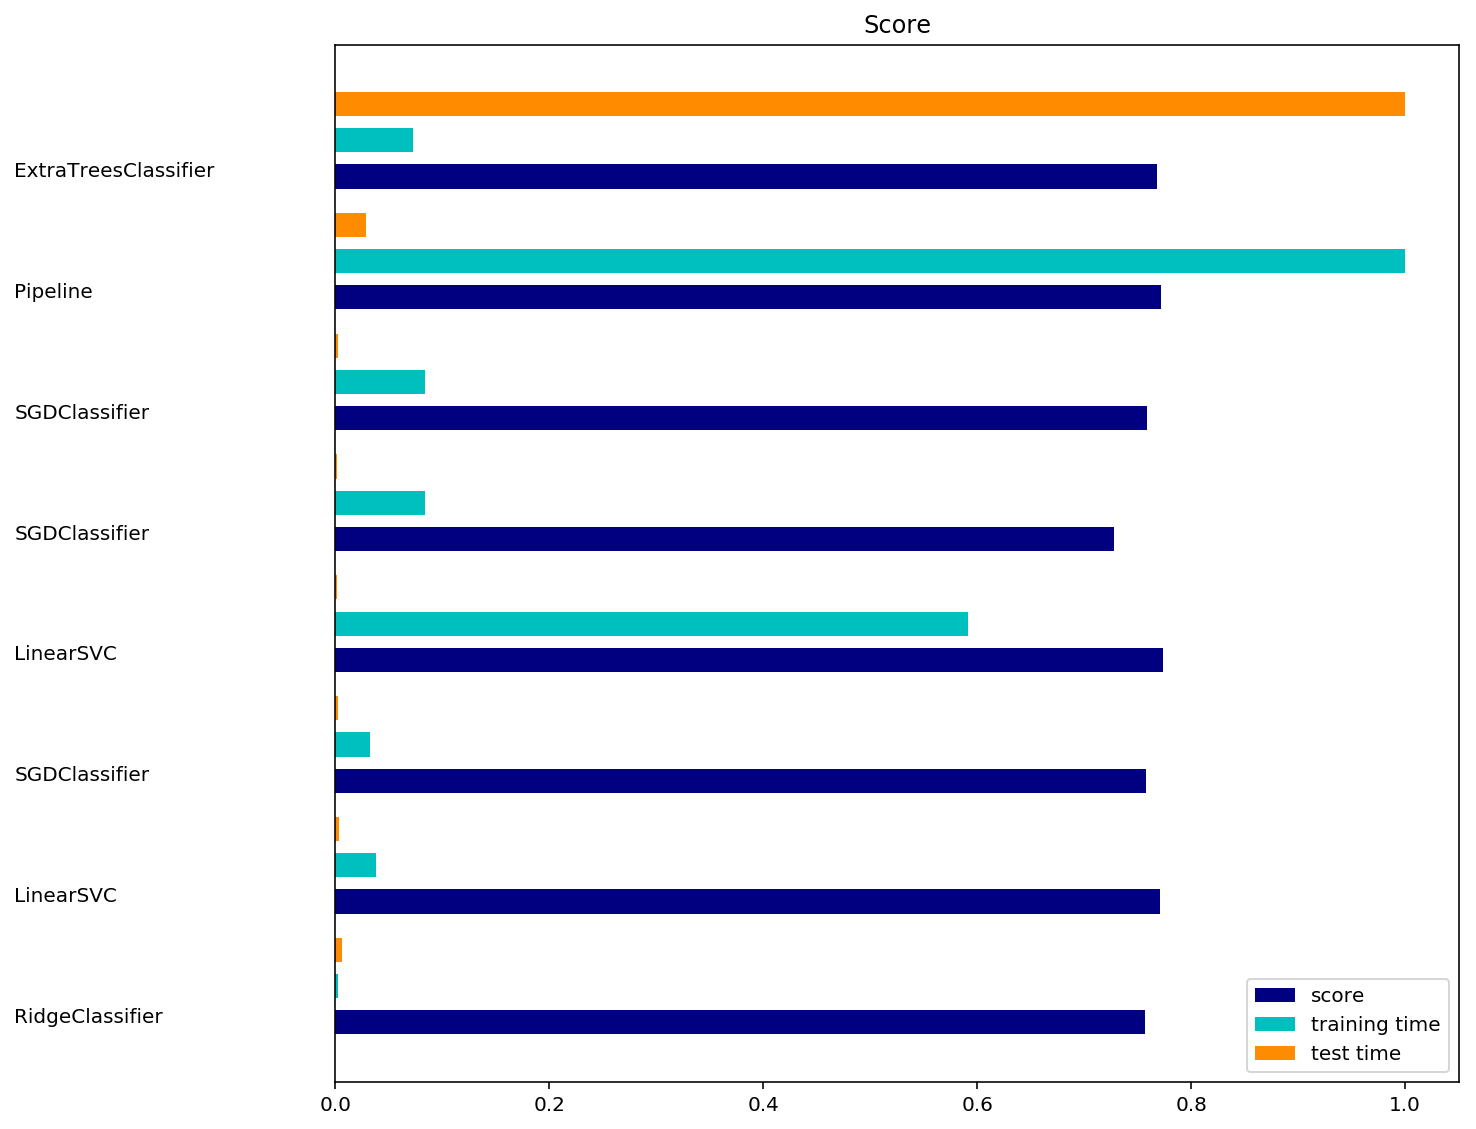

the best model is: LinearSVC, the accuracy is: 0.773


In [159]:
results_model1 = trainandplot(X_w2vm_train, X_w2vm_test)
for i in range(0,8):
    if results_model1[1][i] == max(results_model1[1]):
        print ('the best model is: %s, the accuracy is: %0.3f'%(results_model1[0][i], results_model1[1][i]))

In [156]:
#方法2：在方法1的基础上，使用tfidf对每个词加权求均值，并使用分类模型进行分类

print("Extracting features from the training data using a sparse vectorizer")
t0 = time()
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')

X_tfidf_train = vectorizer.fit_transform([' '.join(document) for document in all_data_nh])
duration = time() - t0
print("n_samples: %d, n_features: %d" % X_tfidf_train.shape)
print()

print("Extracting features from the test data using the same vectorizer")

#X_tfidf_test = vectorizer.transform([' '.join(document) for document in X_ns_test])
#print("n_samples: %d, n_features: %d" % X_tfidf_test.shape)
#print()
duration = time() - t0
print ("Total tfidf procesing time: %0.3f seconds" % duration)


t0 = time()
max_idf = max(vectorizer.idf_)
word2weight = defaultdict(lambda: max_idf, [(word, vectorizer.idf_[index]) 
                                            for word, index in vectorizer.vocabulary_.items()])

def w2v_tfidf(data):
    return np.array([np.mean([w2v[word] * word2weight[word]  for word in document if word in w2v]
                  or [np.zeros(size)], axis = 0) for document in data])

X_w2v_tfidf_train = w2v_tfidf(X_nh_train)
X_w2v_tfidf_test = w2v_tfidf(X_nh_test)

duration = time() - t0
print ("Total tfidf classification vectors processing time: %0.3f seconds" % duration)

Extracting features from the training data using a sparse vectorizer
n_samples: 18846, n_features: 100685

Extracting features from the test data using the same vectorizer
Total tfidf procesing time: 5.153 seconds
Total tfidf classification vectors processing time: 112.858 seconds


Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.283s
test time:  0.022s
accuracy:   0.768

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 6.141s
test time:  0.005s
accuracy:   0.777

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=5

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 5.846s
test time:  0.005s
accuracy:   0.725

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)
train time: 63.685s
test time:  0.003s
accuracy:   0.778

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 9.136s
test time:  0.003s
accuracy:   0.692

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 9.803s
test time:  0.005s
accuracy:   0.727

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 94.215s
test time:  0.015s
accuracy:   0.735

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
        

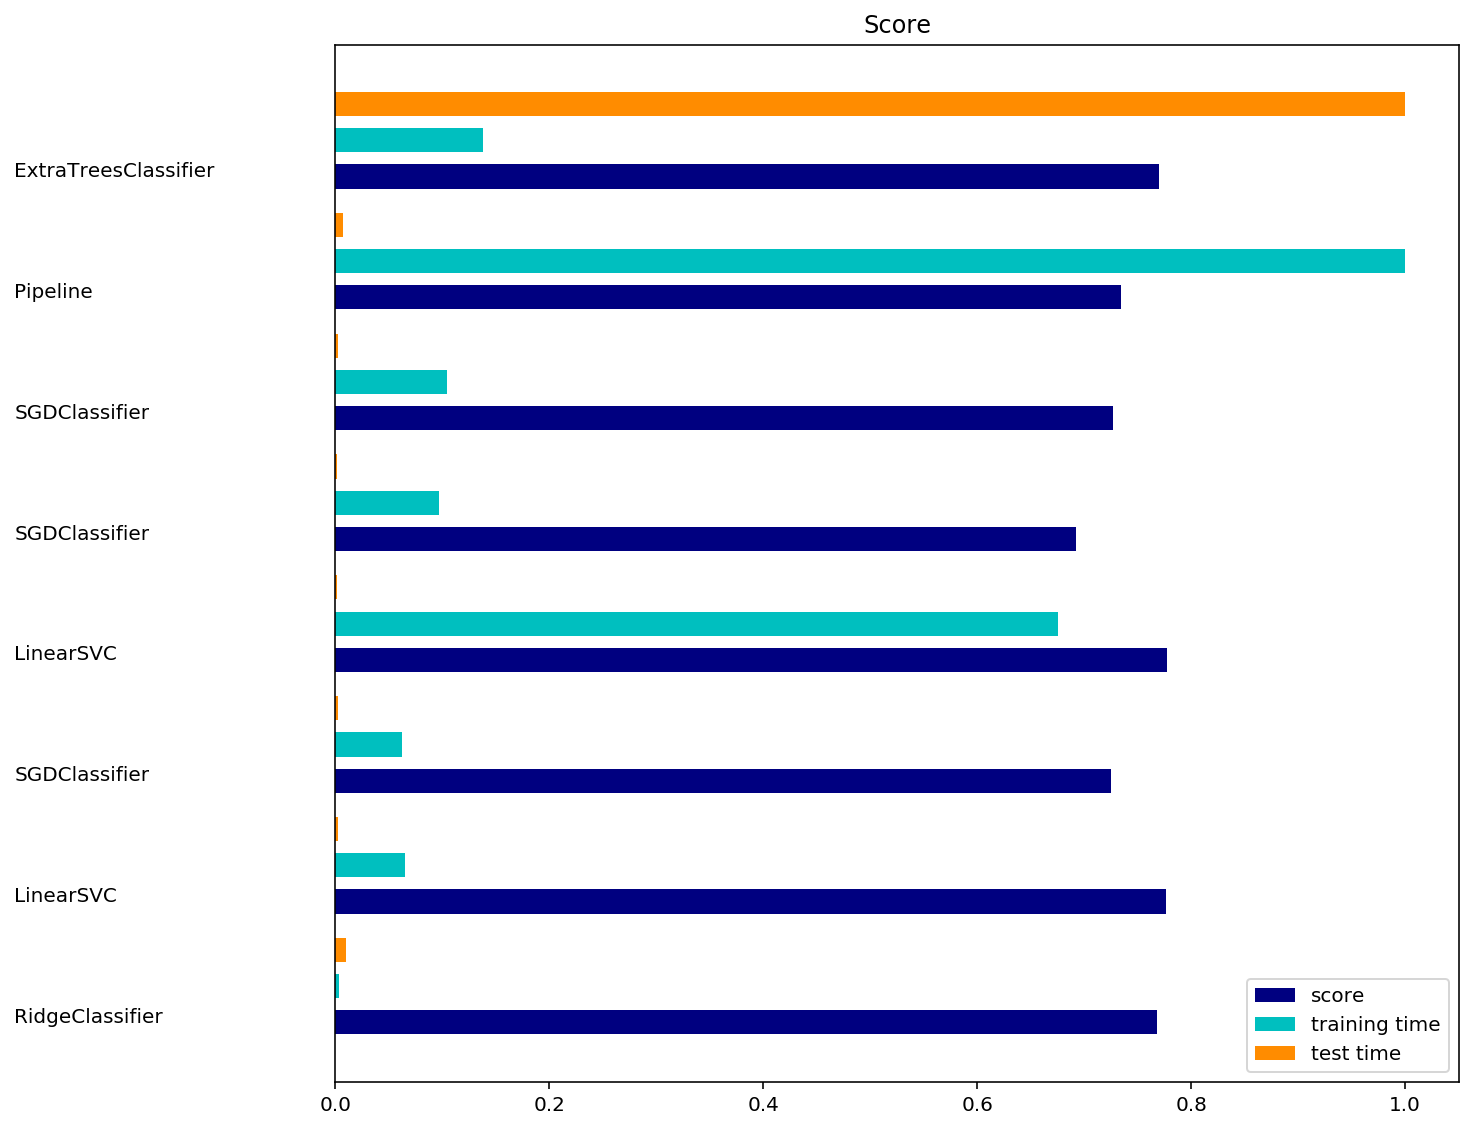

[['RidgeClassifier',
  'LinearSVC',
  'SGDClassifier',
  'LinearSVC',
  'SGDClassifier',
  'SGDClassifier',
  'Pipeline',
  'ExtraTreesClassifier'],
 [0.7679235262878386,
  0.7765533722782794,
  0.7247742963356346,
  0.7777482740308019,
  0.6923791821561338,
  0.7272968667020712,
  0.7348645778013808,
  0.7696494954859268],
 [0.2828209400177002,
  6.1414361000061035,
  5.846184968948364,
  63.68468689918518,
  9.136278867721558,
  9.803412437438965,
  94.21543383598328,
  13.046610832214355],
 [0.02225780487060547,
  0.0045757293701171875,
  0.005462169647216797,
  0.003258943557739258,
  0.0026509761810302734,
  0.004765033721923828,
  0.01514291763305664,
  2.156338930130005]]

In [157]:
results_model2 = trainandplot(X_w2v_tfidf_train, X_w2v_tfidf_test)
for i in range(0,8):
    if results_model2[1][i] == max(results_model2[1]):
        print ('the best model is: %s, the accuracy is: %0.3f'%(results_model2[0][i], results_model2[1][i]))

In [ ]:
#方法3：依照dictionary维度建立一个新向量表示news，每个维度值为该篇news中所有词与该词相似度的最大值
def document_vector(data):
    X_word2vec =[]
    for document in data:
        document_matrix = []
        for vocab in all_words:
            document_matrix.append(max([w2v.similarity(vocab, word) for word in document if word in all_words]))
        X_word2vec.append(document_matrix)
    return X_word2vec

t0 = time()
X_w2vsim_train = document_vector(X_nh_train)
duration = time() - t0
print ("Total X_train procesing time: %0.3f seconds" % duration)

t0 = time()
X_w2vsim_test = document_vector(X_nh_test)
duration = time() - t0
print ("Total X_test procesing time: %0.3f seconds" % duration)

### 完善

2018-05-19 19:35:36,723 INFO collecting all words and their counts
2018-05-19 19:35:36,724 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-19 19:35:37,486 INFO PROGRESS: at sentence #10000, processed 1432141 words, keeping 73949 word types
2018-05-19 19:35:37,958 INFO collected 100874 word types from a corpus of 2633040 raw words and 18846 sentences
2018-05-19 19:35:37,959 INFO Loading a fresh vocabulary
2018-05-19 19:35:39,945 INFO min_count=5 retains 33141 unique words (32% of original 100874, drops 67733)
2018-05-19 19:35:39,946 INFO min_count=5 leaves 2519966 word corpus (95% of original 2633040, drops 113074)
2018-05-19 19:35:40,099 INFO deleting the raw counts dictionary of 100874 items
2018-05-19 19:35:40,105 INFO sample=0.001 downsamples 14 most-common words
2018-05-19 19:35:40,106 INFO downsampling leaves estimated 2475869 word corpus (98.3% of prior 2519966)
2018-05-19 19:35:40,295 INFO estimated required memory for 33141 words and 100 dimension

Total word2vec processing time: 35.783 seconds
Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.160s
test time:  0.004s
accuracy:   0.766

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 4.165s
test time:  0.003s
accuracy:   0.779

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 3.623s
test time:  0.004s
accuracy:   0.698

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)
train time: 42.053s
test time:  0.003s
accuracy:   0.779

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 7.551s
test time:  0.006s
accuracy:   0.694

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 6.992s
test time:  0.003s
accuracy:   0.712

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 80.119s
test time:  0.011s
accuracy:   0.733

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
        

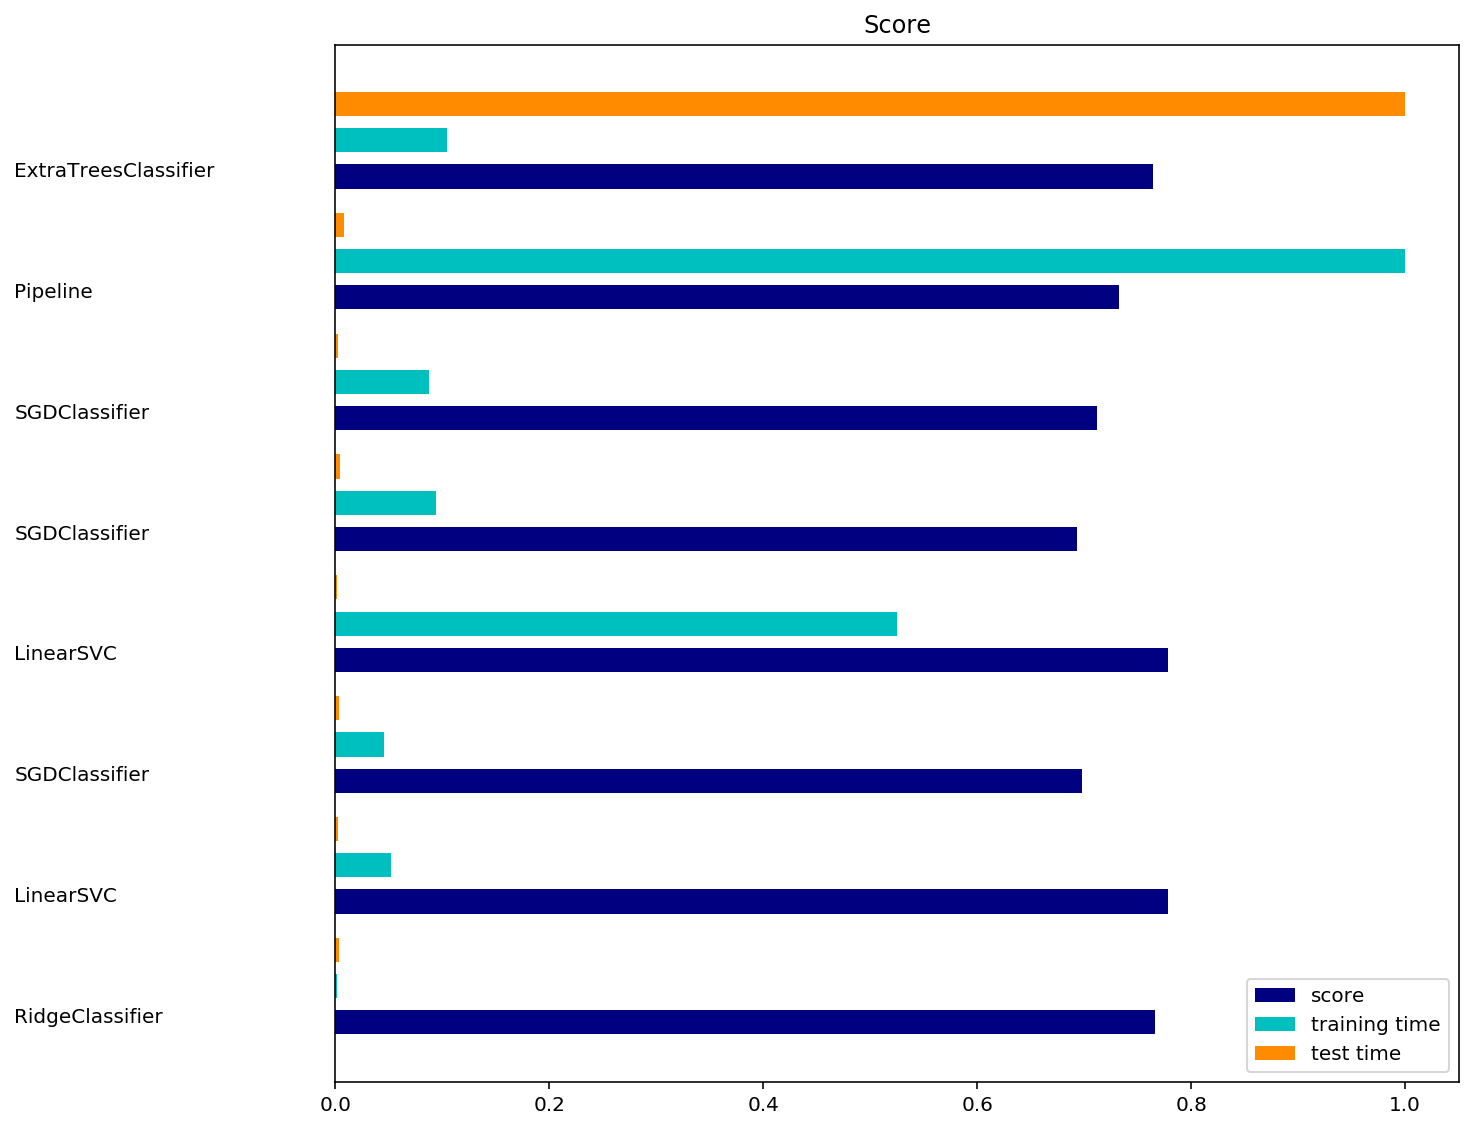

the best model is: LinearSVC, the accuracy is: 0.779


2018-05-19 19:39:07,887 WARNING consider setting layer size to a multiple of 4 for greater performance
2018-05-19 19:39:07,888 INFO collecting all words and their counts
2018-05-19 19:39:07,889 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-19 19:39:08,552 INFO PROGRESS: at sentence #10000, processed 1432141 words, keeping 73949 word types
2018-05-19 19:39:09,171 INFO collected 100874 word types from a corpus of 2633040 raw words and 18846 sentences
2018-05-19 19:39:09,172 INFO Loading a fresh vocabulary
2018-05-19 19:39:09,326 INFO min_count=5 retains 33141 unique words (32% of original 100874, drops 67733)
2018-05-19 19:39:09,327 INFO min_count=5 leaves 2519966 word corpus (95% of original 2633040, drops 113074)
2018-05-19 19:39:09,489 INFO deleting the raw counts dictionary of 100874 items
2018-05-19 19:39:09,493 INFO sample=0.001 downsamples 14 most-common words
2018-05-19 19:39:09,494 INFO downsampling leaves estimated 2475869 word corpus (98.3% of 

Total word2vec processing time: 42.794 seconds
Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.336s
test time:  0.007s
accuracy:   0.771

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 7.100s
test time:  0.003s
accuracy:   0.774

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 4.743s
test time:  0.003s
accuracy:   0.735

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)
train time: 171.175s
test time:  0.004s
accuracy:   0.775

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 10.349s
test time:  0.004s
accuracy:   0.698

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 10.560s
test time:  0.003s
accuracy:   0.719

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 215.738s
test time:  0.013s
accuracy:   0.748

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
      

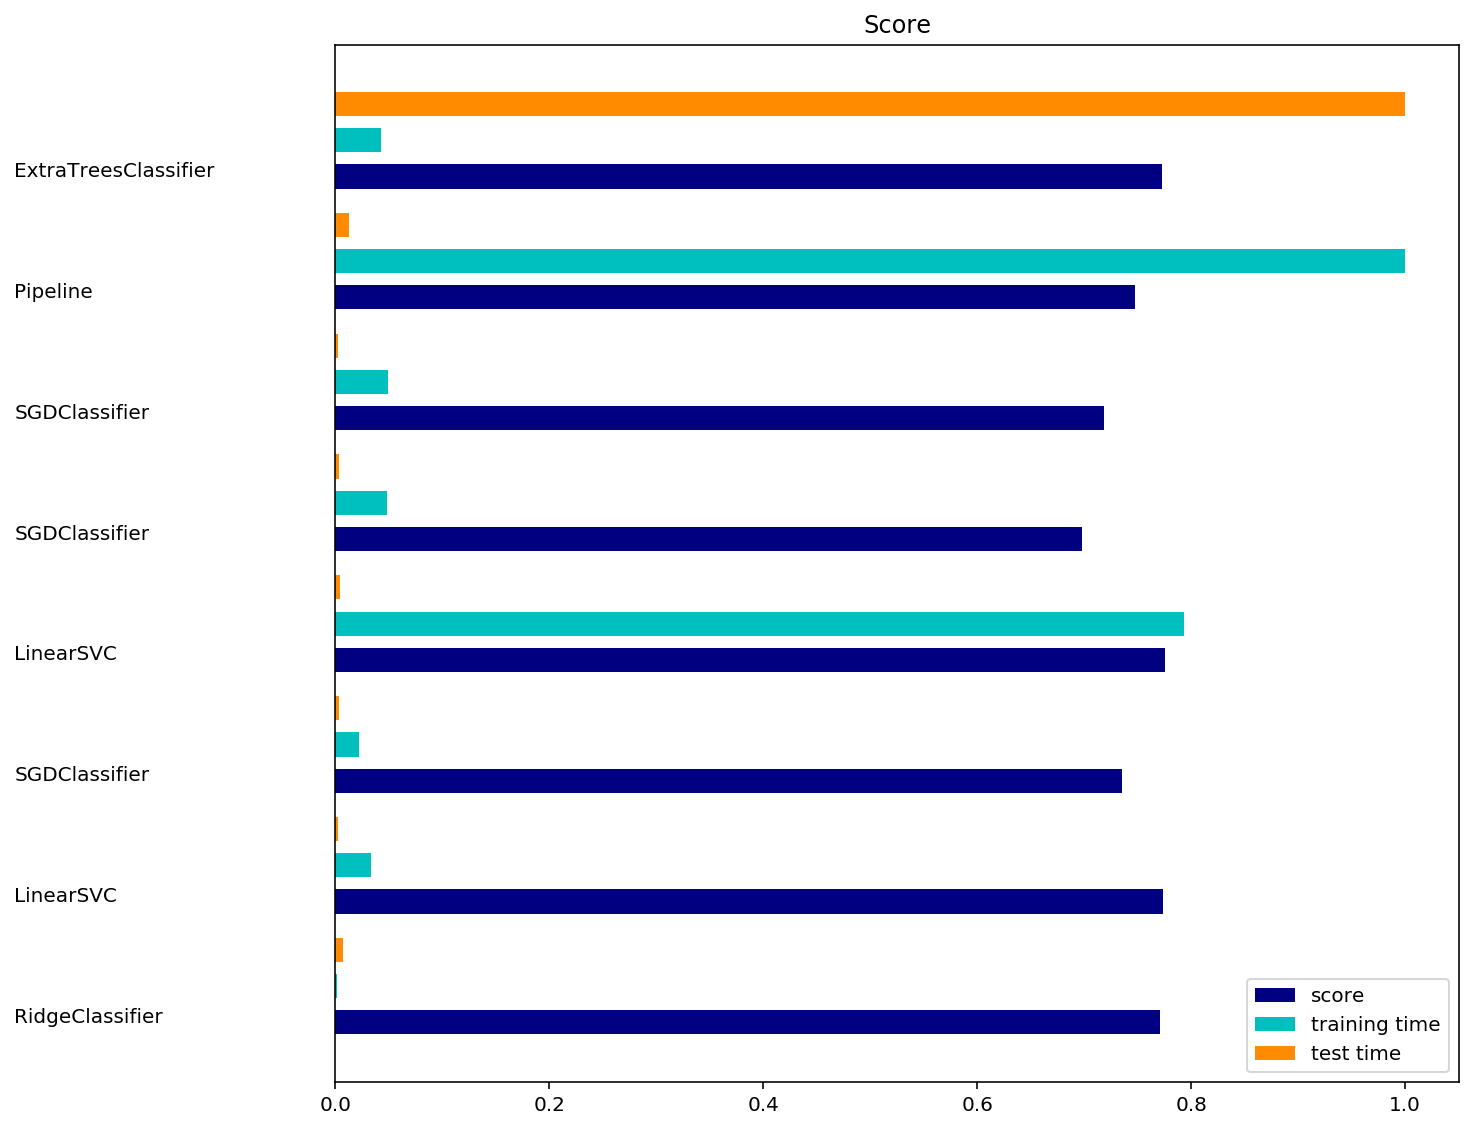

the best model is: LinearSVC, the accuracy is: 0.775


2018-05-19 19:47:24,183 INFO collecting all words and their counts
2018-05-19 19:47:24,184 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-19 19:47:24,745 INFO PROGRESS: at sentence #10000, processed 1432141 words, keeping 73949 word types
2018-05-19 19:47:25,228 INFO collected 100874 word types from a corpus of 2633040 raw words and 18846 sentences
2018-05-19 19:47:25,229 INFO Loading a fresh vocabulary
2018-05-19 19:47:25,396 INFO min_count=5 retains 33141 unique words (32% of original 100874, drops 67733)
2018-05-19 19:47:25,397 INFO min_count=5 leaves 2519966 word corpus (95% of original 2633040, drops 113074)
2018-05-19 19:47:25,569 INFO deleting the raw counts dictionary of 100874 items
2018-05-19 19:47:25,573 INFO sample=0.001 downsamples 14 most-common words
2018-05-19 19:47:25,575 INFO downsampling leaves estimated 2475869 word corpus (98.3% of prior 2519966)
2018-05-19 19:47:25,776 INFO estimated required memory for 33141 words and 200 dimension

Total word2vec processing time: 41.124 seconds
Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.454s
test time:  0.006s
accuracy:   0.782

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 14.865s
test time:  0.005s
accuracy:   0.771

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate=

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 5.787s
test time:  0.004s
accuracy:   0.744

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)
train time: 246.044s
test time:  0.004s
accuracy:   0.775

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 14.475s
test time:  0.004s
accuracy:   0.720

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 14.696s
test time:  0.005s
accuracy:   0.735

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 279.614s
test time:  0.018s
accuracy:   0.753

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
      

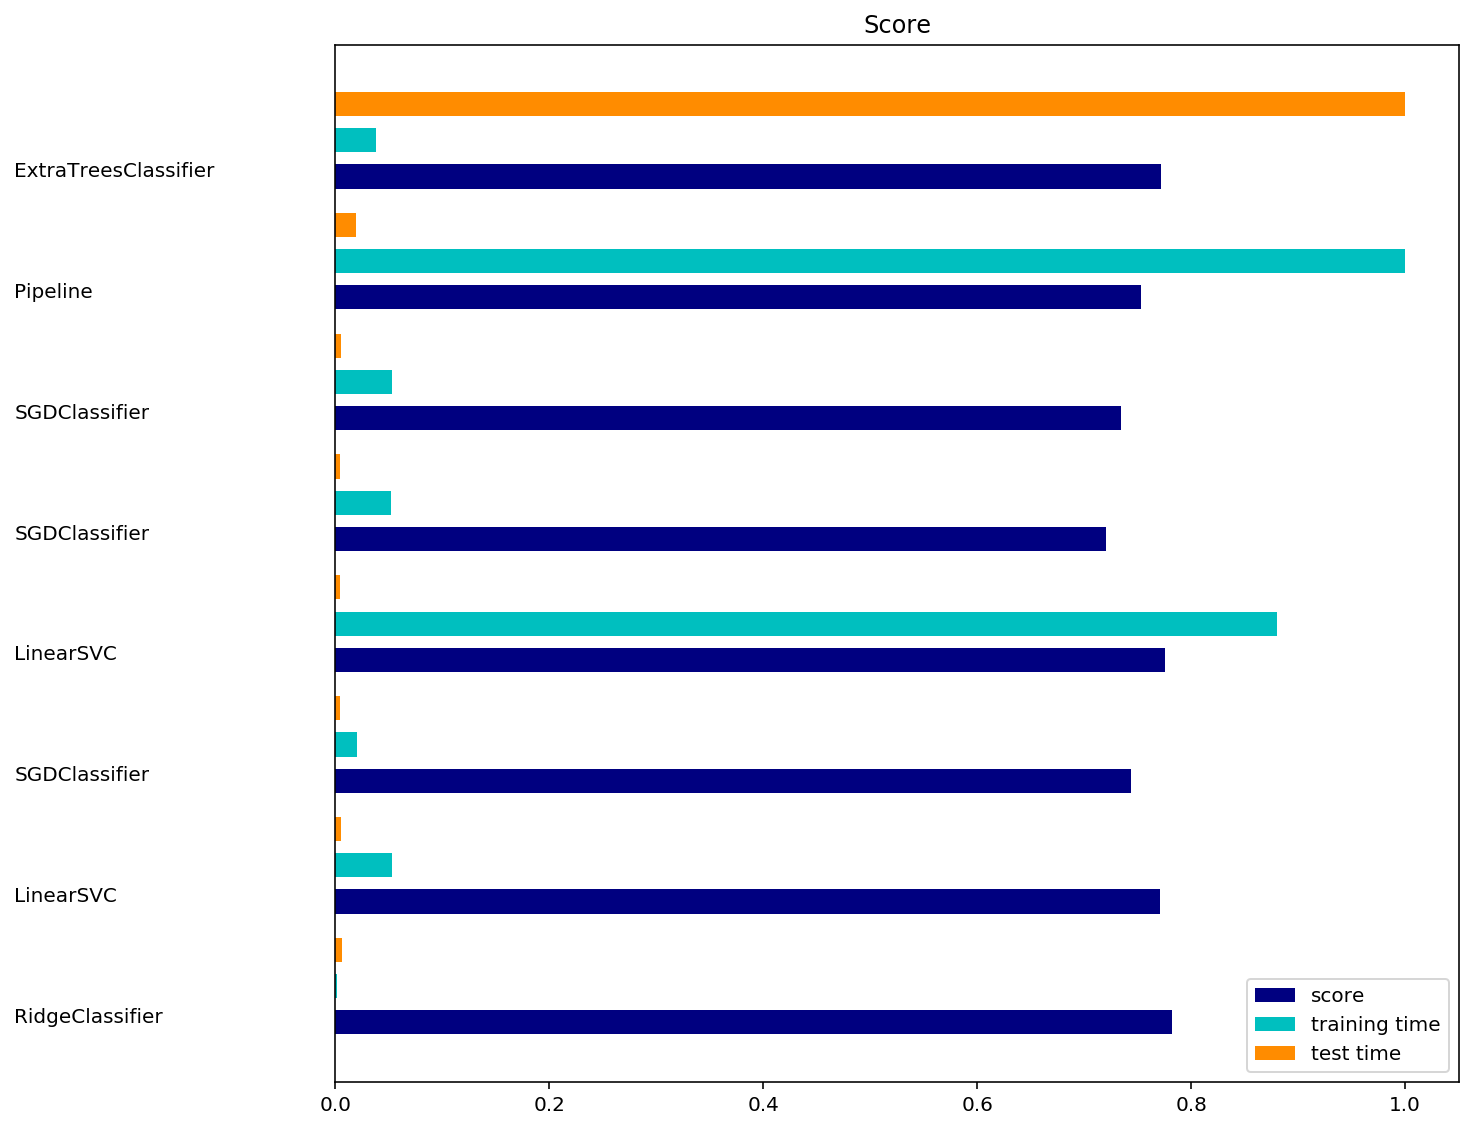

the best model is: RidgeClassifier, the accuracy is: 0.782


2018-05-19 19:58:16,952 WARNING consider setting layer size to a multiple of 4 for greater performance
2018-05-19 19:58:16,953 INFO collecting all words and their counts
2018-05-19 19:58:16,954 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-19 19:58:17,518 INFO PROGRESS: at sentence #10000, processed 1432141 words, keeping 73949 word types
2018-05-19 19:58:17,987 INFO collected 100874 word types from a corpus of 2633040 raw words and 18846 sentences
2018-05-19 19:58:17,989 INFO Loading a fresh vocabulary
2018-05-19 19:58:18,187 INFO min_count=5 retains 33141 unique words (32% of original 100874, drops 67733)
2018-05-19 19:58:18,189 INFO min_count=5 leaves 2519966 word corpus (95% of original 2633040, drops 113074)
2018-05-19 19:58:18,391 INFO deleting the raw counts dictionary of 100874 items
2018-05-19 19:58:18,395 INFO sample=0.001 downsamples 14 most-common words
2018-05-19 19:58:18,397 INFO downsampling leaves estimated 2475869 word corpus (98.3% of 

2018-05-19 19:59:07,562 INFO worker thread finished; awaiting finish of 1 more threads
2018-05-19 19:59:07,606 INFO worker thread finished; awaiting finish of 0 more threads
2018-05-19 19:59:07,608 INFO EPOCH - 5 : training on 2633040 raw words (2475883 effective words) took 8.6s, 286890 effective words/s
2018-05-19 19:59:07,609 INFO training on a 13165200 raw words (12379793 effective words) took 48.1s, 257312 effective words/s


Total word2vec processing time: 51.547 seconds
Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.591s
test time:  0.009s
accuracy:   0.777

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 27.094s
test time:  0.006s
accuracy:   0.774

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate=

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 7.134s
test time:  0.005s
accuracy:   0.743

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)
train time: 298.099s
test time:  0.008s
accuracy:   0.778

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 18.076s
test time:  0.004s
accuracy:   0.718

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 18.049s
test time:  0.004s
accuracy:   0.735

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 341.650s
test time:  0.022s
accuracy:   0.756

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
      

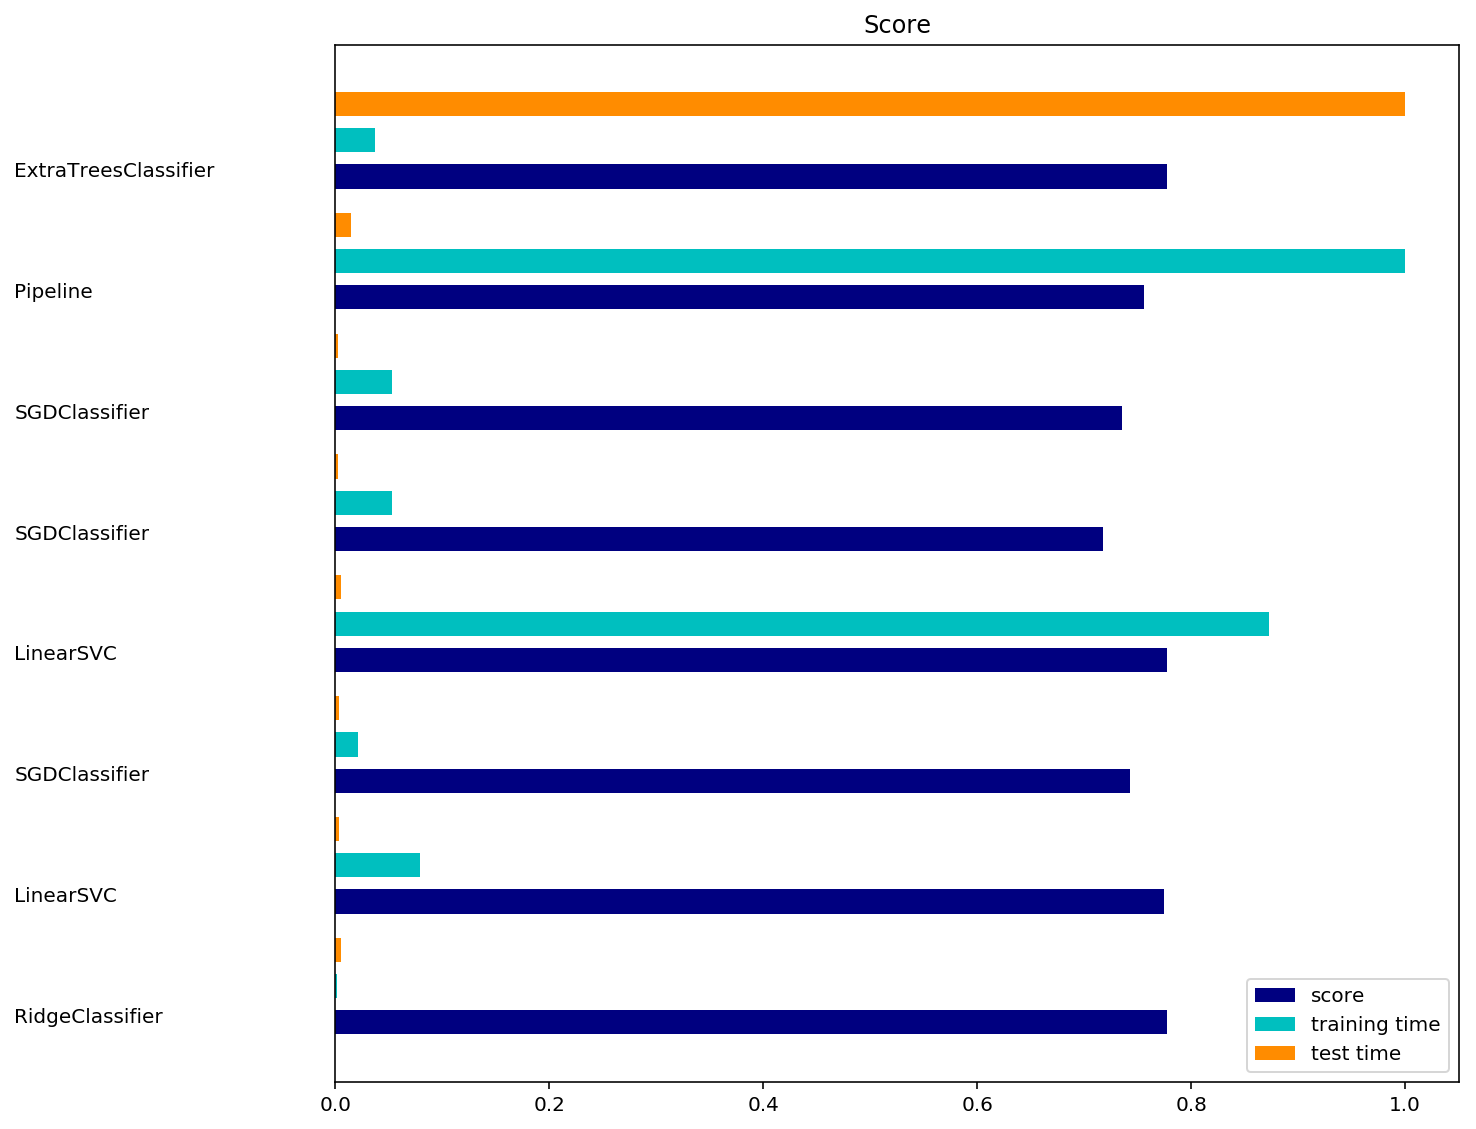

the best model is: LinearSVC, the accuracy is: 0.778


2018-05-19 20:11:38,556 INFO collecting all words and their counts
2018-05-19 20:11:38,557 INFO PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-19 20:11:39,146 INFO PROGRESS: at sentence #10000, processed 1432141 words, keeping 73949 word types
2018-05-19 20:11:39,664 INFO collected 100874 word types from a corpus of 2633040 raw words and 18846 sentences
2018-05-19 20:11:39,666 INFO Loading a fresh vocabulary
2018-05-19 20:11:41,704 INFO min_count=5 retains 33141 unique words (32% of original 100874, drops 67733)
2018-05-19 20:11:41,705 INFO min_count=5 leaves 2519966 word corpus (95% of original 2633040, drops 113074)
2018-05-19 20:11:41,888 INFO deleting the raw counts dictionary of 100874 items
2018-05-19 20:11:41,894 INFO sample=0.001 downsamples 14 most-common words
2018-05-19 20:11:41,898 INFO downsampling leaves estimated 2475869 word corpus (98.3% of prior 2519966)
2018-05-19 20:11:42,080 INFO estimated required memory for 33141 words and 300 dimension

2018-05-19 20:12:33,015 INFO worker thread finished; awaiting finish of 2 more threads
2018-05-19 20:12:33,017 INFO worker thread finished; awaiting finish of 1 more threads
2018-05-19 20:12:33,112 INFO worker thread finished; awaiting finish of 0 more threads
2018-05-19 20:12:33,113 INFO EPOCH - 5 : training on 2633040 raw words (2475736 effective words) took 10.0s, 246968 effective words/s
2018-05-19 20:12:33,114 INFO training on a 13165200 raw words (12379098 effective words) took 50.3s, 246061 effective words/s


Total word2vec processing time: 55.479 seconds
Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.715s
test time:  0.009s
accuracy:   0.773

L2 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0)
train time: 67.151s
test time:  0.049s
accuracy:   0.772

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate=

/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 11.666s
test time:  0.010s
accuracy:   0.737

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)
train time: 408.486s
test time:  0.008s
accuracy:   0.778

________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 23.329s
test time:  0.007s
accuracy:   0.713

Elastic-Net penalty
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=50,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


/Users/zhanglongyi/anaconda2/envs/tensorflow36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


train time: 21.648s
test time:  0.007s
accuracy:   0.748

LinearSVC with L1-based feature selection
________________________________________________________________________________
Training: 
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0),
        norm_order=1, prefit=...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
train time: 434.883s
test time:  0.032s
accuracy:   0.754

extra trees
________________________________________________________________________________
Training: 
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
      

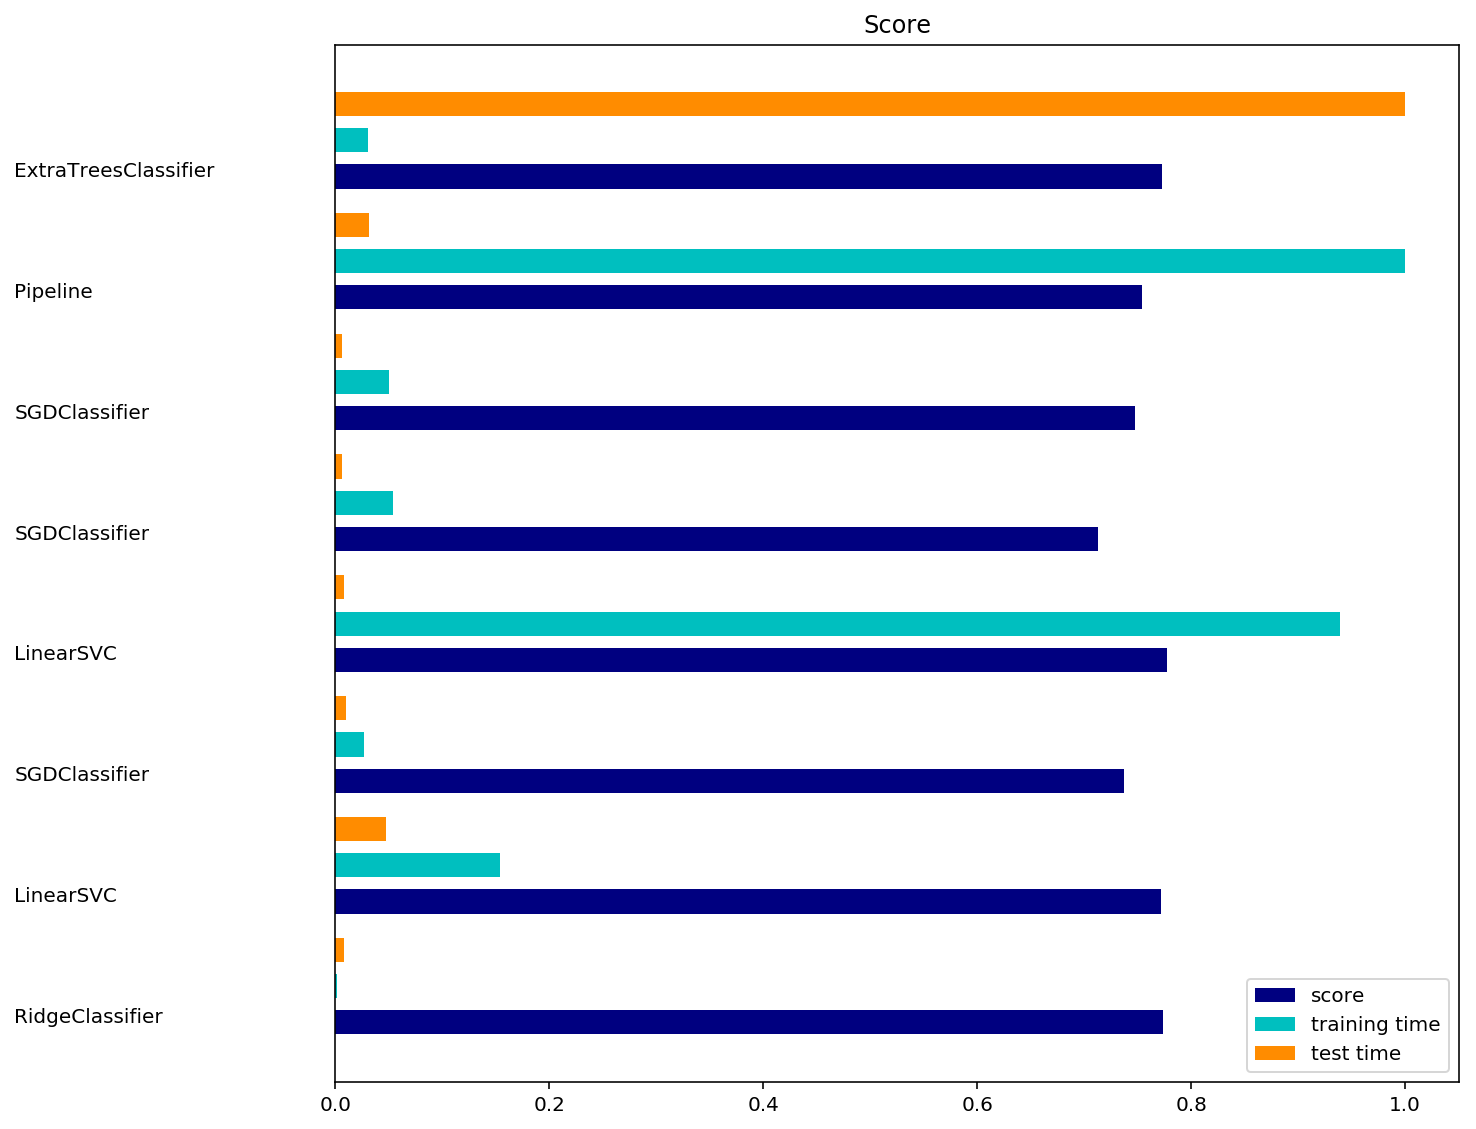

the best model is: LinearSVC, the accuracy is: 0.778


In [161]:
#调参
result_parameter_adjust = []
for size in range(100, 301, 50):
    t0 = time()
    all_data_nh = np.append(X_nh_train, X_nh_test)
    all_words = set(word for document in all_data_nh for word in document)
    model = Word2Vec(all_data_nh, size=size, alpha=0.05, window=30, min_count=5, workers=multiprocessing.cpu_count())
    w2v = model.wv
    duration = time() - t0
    print ("Total word2vec processing time: %0.3f seconds" % duration)
    
    X_w2v_tfidf_train = w2v_tfidf(X_nh_train)
    X_w2v_tfidf_test = w2v_tfidf(X_nh_test)
    
    results_model2 = trainandplot(X_w2v_tfidf_train, X_w2v_tfidf_test)
    for i in range(0,8):
        if results_model2[1][i] == max(results_model2[1]):
            print ('the best model is: %s, the accuracy is: %0.3f'%(results_model2[0][i], results_model2[1][i]))
            result_parameter_adjust.append([results_model2[0][i], results_model2[1][i]])

#对最好的模型进行词干提取和词形还原，看看是否有所提高

In [162]:
print(result_parameter_adjust)

[['LinearSVC', 0.7788104089219331], ['LinearSVC', 0.7754912373871482], ['RidgeClassifier', 0.7818640467339352], ['LinearSVC', 0.7777482740308019], ['LinearSVC', 0.7777482740308019]]


## IV. 结果
### 模型的评价与验证


### 合理性分析

## V. 项目结论
### 结果可视化


### 对项目的思考

### 需要作出的改进
